<a href="https://colab.research.google.com/github/RobertNimmo26/covid19-reinforcement-learning/blob/main/Coursework_COMPSCI_4004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial Intelligence (COMPSCI 4004) Coursework

*Robert Nimmo - 2379875N* 

University of Glasgow


## Abstract
> The report investiaged the performance of three agents - random, deterministic and Q-Learning agent - and compared the performance of these agents against each other using three different simulated epidemic environment conditions. Utilising previous evaluation results, the report looked at possible improvements to the Q-Learning agent to perform better in the stochastic environment. It was found that the Q-Learning agent performed the best and produce the most sensible policies, although in a real life instance none of the policies produced by the agents could be fully used to inform decisions due to the limitations in the environment and other social factors involved.

In [ ]:
# Obtain the notebook JSON as a string
from google.colab import _message
notebook_json = _message.blocking_request('get_ipynb', request='', timeout_sec=25)

# collate all text in Markdown cells
all_text = ''
for cell in notebook_json['ipynb']['cells']:
    if cell['cell_type'] == "markdown":
        all_text += ' '.join(cell['source'])
# replace # and \n by empty space
all_text = all_text.replace('#', '').replace('\n', '')
# find main section and reference & appendix section
before_eof, eof, after_eof = all_text.partition('===EOF===') # please do not temper with this

# count words per section, our counting method is simple and probably plays in your favor
report_word_count = len(before_eof.split())
remaining_word_count = len(after_eof.split())

print("Your report currently has {} words".format(report_word_count))
print("Your reference and appendix currently have {} words".format(remaining_word_count))

# Please respect this convention and work with it, not against it.
# We will run an independant word count check on all notebooks submitted

Your report currently has 4959 words
Your reference and appendix currently have 455 words


# 1. Introduction


## 1.1 Motivation

> The COVID-19 pandemic has caused goverments around the world to implement restrictive measures to limit the spread of COVID-19. Many goverments have never had to take so drastic measure in modern day times. This has resulted in many different approaches by various goverments to put in place restrictive measure. 

>Through this coursework we will look at creating the most optimal strategy which a goverment could use to set their policy. We will look at utalising Reinforcement Learning, specifically a Q-Learning with Neural Network Function Approximation agent, to make suggestion on one of four non-medical actions to take each week to mitigate the effect COVID-19 has.

## 1.2 Task Environment

### Introduction of the environment
> The task environment being used for this coursework is a Epidemics Reinforcement Learning Environment called ViRL. It is specifically used to simulate 52 weeks of COVID-19. The environment is used to explore the effect of different mitigation polices on the spread of the virus.

#### Policies

> Four non-medical policies are able to be taken once a week to help control the spread of the COVID-19 virus. These policies include:
0. No intervention (removing all restrictions)
1. Impose a full lockdown
2. Implement track & trace
3. Enforce social distancing and face masks


> Once a week, the environment returns state of the epidemic, a single scalar reward value and a boolean value representing if the simulation is done. 

#### State

> The returned state include the number of people that are:
0. Susceptible
1. Infectious
2. Quarantined
3. Recovered
> Using the information of the state of the epidemic, the agent can decide which action should be taken next. 

#### Reward

> The reward value summarises the different impacts each intervention has during the pandemic. This includes taking into account the current infection rate, the total number of people simultaneously infected and hospitalized, and the possible economic cost that each intervention has. The goal is to maxamise the reward value as much as possible.

#### Problem ID
> The ViRL enviroment includes 10 deterministic epidemic problems [0-9], each problem has different effects on the simulation.
```
env = virl.Epidemic(problem_id=1) # 0 by default.
```

#### Other Parameters
> Observation noise can be added to each timestamp by setting the `noisy` flag to True when initalising the environment.
```
env = virl.Epidemic(noisy=True) # False by default.
```

> A stochastic environment can be activated by setting the `stochastic` flag to True when initalising the environment. The stochastic environment changes the epidemic dynamics for each episode. The problem ID is ignored if stochastic environment is True.
```
env = virl.Epidemic(stochastic=True) # False by default.
```

### Setup the environment

#### Clone from GitLab
> We first clone the environment from GitLab to our working directory 

In [ ]:
!git clone https://git.dcs.gla.ac.uk/SebastianStein/virl.git

Cloning into 'virl'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (55/55), done.


#### Add the ViRL folder to the path
> To be able to import the ViRL library, we are required to add the ViRL folder to the path so python can look at it

In [ ]:
import sys
sys.path.append('virl')
import virl

#### Import required libaries 

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import markers as mks

import numpy as np

### How to run
> A dummy agent has been created below to show how to run a simple agent which take the same action every week

In [ ]:
env = virl.Epidemic()

states = []
rewards = []
actions = []
done = False

s = env.reset() # reset the environment before using it and log the starting state
states.append(s)
while not done:    
    action = [0,0,0,0]
    s, r, done, i = env.step(action=0) # dummy agent doing action 0 (no-intervention)
    action[0] = 1
    actions.append(action)
    states.append(s)
    rewards.append(r)

actions = np.array(actions)

> The evolution of states and reward for the 52 weeks of this epidemic simulation have been plotted below.

Total reward for this episode is  -1.9231823993453754


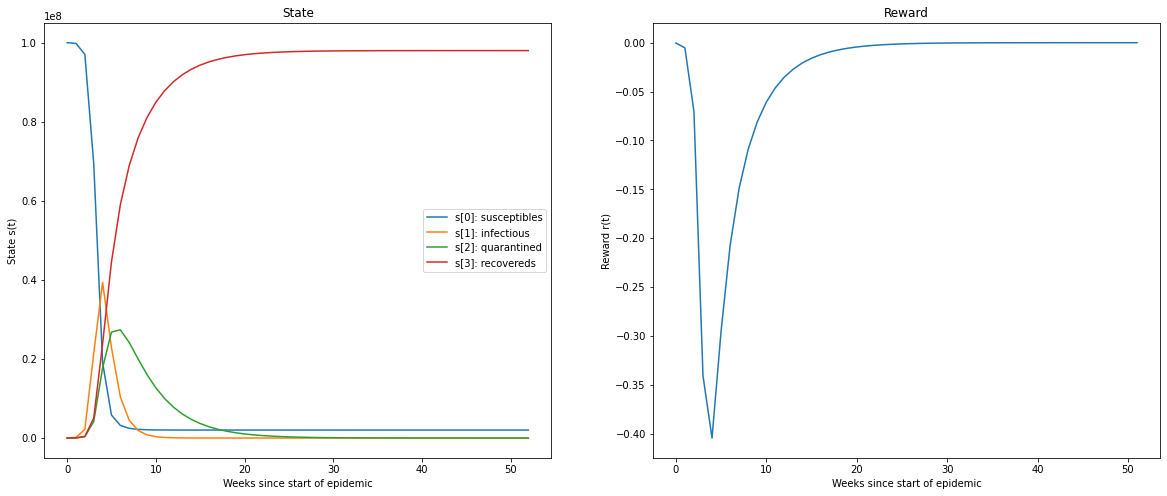

In [ ]:
# start a figure with 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
states = np.array(states)

# plot state evolution on the top left subplot
for i in range(4):
    axes[0].plot(states[:,i], label=labels[i]);
axes[0].set_title('State')
axes[0].set_xlabel('Weeks since start of epidemic')
axes[0].set_ylabel('State s(t)')
axes[0].legend()
 
# plot reward evolution on the bottom left subplot
axes[1].plot(rewards);
axes[1].set_title('Reward')
axes[1].set_xlabel('Weeks since start of epidemic')
axes[1].set_ylabel('Reward r(t)')

print('Total reward for this episode is ', np.sum(rewards))

## 1.3 PEAS Analysis

> - **Performance:** the reward value (infection rate, total number of simultaneously infected and hospitalized and economic oppotunity cost - summarised by the reward value)
- **Environment:** ViRL Epidemics Reinforcement Learning Environment
- **Actuators:** impose a full lockdown on the population, implement track & trace system, enforcing social distancing and wearing face masks, no action
- **Sensors:** number of people susceptible, infectious, quarantined, recovered

# 2. Method and Implementation

> I have implemented three types of agents which returns an action every week to be used by the VIRL environment. These agents are a Random agent, Deterministic agent and a Q-Learning with Neural Network Function Approximation agent.

## 2.1 Random Agent

> I have developed a random agent which takes a random action, between (0-3), each week in the epidemic. The state of the epidemic is not utalised in this agent. 

>The random action equation:
>
>$actiontaken := generateRandomInt[0, 3]$


In [ ]:
# add code for your random agent 

import random

def random_agent():
  return random.randint(0, 3)

## 2.2 Deterministic Agent
> I have developed a deterministic agent which utalises the current state of the epidemic to decide which action to take. Every week of the epidemic the agent updates it's decision. It initally checks if the number of infectious people that week is above 5900 people. If it is, the agent will take the action of a full lockdown. Each full lockdown will always last for two weeks. After the two weeks the agent will take the action of enforcing social distancing and face masks. If the number of infectious people is below 5900, the agent will first check if the number of infectious people is above or equal to 350 people. The agent will then take the action of enforcing social distancing and face masks. Lastly if the number of infectious people is below 350, the agent will take the action of implementing track and trace.

In [ ]:
def deterministic_agent(states):
    """
    states: current state of the epidemic
    
    action_taken: the action the deterministic agent has chosen to take
    """

    # Infectious people > 5900
    if states[-1][1] > 5900:
      # Full lockdown action is taken
      action_taken = 1

    # Two weeks of full lockdown has occured
    elif deterministic_agent.quarantine == 1:
      # Enforce social distancing and face masks
      action_taken = 3
      # Reset number weeks lockdown has occured
      deterministic_agent.quarantine = 0

    # Infectious people >= 350
    elif states[-1][1] >= 350:
      # Enforce social distancing and face masks
      action_taken = 3

    # Infectious people < 350
    elif states[-1][1] < 350:
      # Implement track and trace
      action_taken = 2

    else:
      # 1 week of full lockdown has occured
      deterministic_agent.quarantine += 1

    return action_taken

## 2.3 Q-Learning with Function Approximation

> I have developed a reinforcement learning agent using Q-Learning with Function Approximation. My approach uses two neural network, a Q network and a target network. A replay buffer is used to save all the observations up to a certain period back in time. The Q-Learning agent takes a random batch of samples from this buffer, so that it contains a mix of older and newer samples, which is used while updating the neural network

> The training stage for the Q-Learning agent runs for a user defined number of episodes. For each episode the enviroment is reset and the state normalised and reshapen to a 1xd_state numpy array. For each week in each episode an action is selected using a epsilon greedy policy and the VIRL environment takes the specfic action choosen. The next state and reward value is returned and the state array is normalised and reshapen to a 1xd_state numpy array. The observations made by the environment is added to the replay buffer. If the alpha value, the learning rate of the functional approximator > 0.0 and the current replay buffer size is greater or equal to the batch size 128, the neural network is updated. During the neural network update, the replay buffer is sampled. The Q network and target network predicts the Q Value and target Q value respectively. The TD-target is calculated using the predicted target Q value with the equation below:
> $$\text{TD-target}=R(s) + \gamma {\max _{a'}}\hat Q_w(s',a')$$
> The Q network function approximator is updated using the TD-target just calculated previously, where a single gradient step is taken. 

> After an episode the target network weights are synced with the Q network and if the episode reward is better than the best previous episode, the Q network function approximator weights are saved in a output file.

>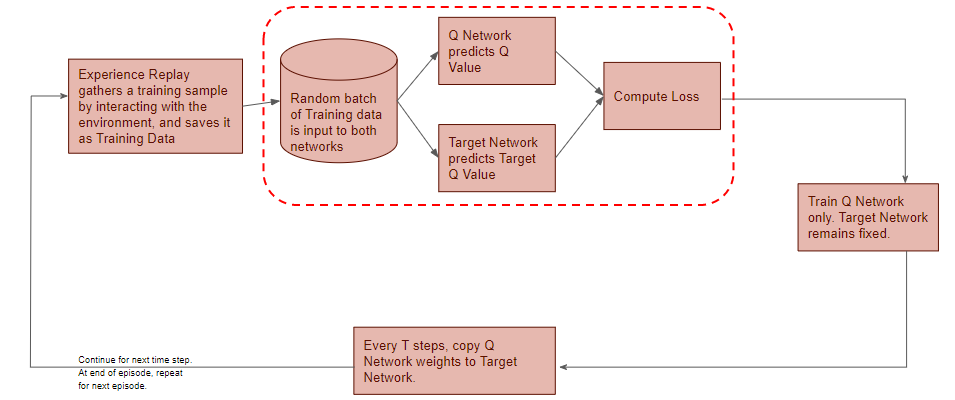
> *Deep Q-Network workflow diagram - Doshi, K. (2021)* 

<br>

> *The Q-Learning agent code is based on code from week 8 part II lab  - Sand Jensen, B and Grizou J. (2021)*

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from collections import namedtuple
from collections import deque

In [ ]:
class NNFunctionApproximatorJointKeras():
    """
    A basic MLP neural network approximator and estimator using Keras     
    """
    
    def __init__(self, alpha, d_states, n_actions, nn_config, verbose=False):        
        self.alpha = alpha    
        self.nn_config = nn_config # determines the size of the hidden layer          
        self.n_actions = n_actions        
        self.d_states = d_states
        self.verbose=verbose # Print debug information        
        self.n_layers = len(nn_config)                
        self.model = self._build_model()                
                        
    def _huber_loss(self,y_true, y_pred, clip_delta=1.0):
        error = y_true - y_pred
        cond  = K.abs(error) <= clip_delta
        squared_loss = 0.5 * K.square(error)
        quadratic_loss = 0.5 * K.square(clip_delta) + clip_delta * (K.abs(error) - clip_delta)
        return K.mean(tf.where(cond, squared_loss, quadratic_loss))

    def _build_model(self):
        # Neural Net for Deep-Q learning 
        model = Sequential()
        for ilayer in self.nn_config:
            model.add(Dense(ilayer, input_dim=self.d_states, activation='relu'))        
        model.add(Dense(self.n_actions, activation='linear'))
        model.compile(loss=self._huber_loss, # define a special loss function
                      optimizer=Adam(lr=self.alpha, clipnorm=10.)) # specify the optimiser, we clip the gradient of the norm which can make traning more robust
        return model

    def predict(self, s, a=None):              
        if a==None:            
            return self._predict_nn(s)
        else:                        
            return self._predict_nn(s)[a]
        
    def _predict_nn(self,state_hat):                          
        """
        Predict the output of the neural netwwork
        """                
        x = self.model.predict(state_hat)                                                    
        return x
  
    def update(self, states, td_target):           
        self.model.fit(states, td_target, epochs=1, verbose=0) # take one gradient step using the optimiser               
        return 

In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward','is_not_terminal_state'))

class ReplayMemory():
    """
    Implement a replay buffer using the deque collection
    """

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = deque(maxlen=capacity)               

    def push(self, *args):
        """Saves a transition."""
        self.memory.append(Transition(*args))

    def pop(self):
        return self.memory.pop()

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)   

    def __len__(self):
        return len(self.memory)

In [ ]:
# Keep track of some stats
EpisodeStats = namedtuple("Stats",["episode_rewards"])

# Main Q-learner
def q_learning_nn(env, func_approximator, func_approximator_target, num_episodes,discount_factor=0.95, epsilon_init=0.01, epsilon_decay=0.99995,epsilon_min=0.01,use_batch_updates=True, fn_model_in=None, fn_model_out=None):
    """
    Q-Learning algorithm for Q-learning using Function Approximations.
    Finds the optimal greedy policy while following an explorative greedy policy.
    
    Args:
        env: OpenAI environment.
        func_approximator: Action-Value function estimator, behavior policy (i.e. the function which determines the next action)
        func_approximator_target: Action-Value function estimator, updated less frequenty than the behavior policy 
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        epsilon_init: Exploration strategy; chance the sample a random action. Float between 0 and 1.
        epsilon_decay: Each episode, epsilon is decayed by this factor
        epislon_min: Min epsilon value        
        use_batch_updates=True, 
        fn_model_in: Load the model from the file if not None
        fn_model_out: File name of the saved model, saves the best model in the last 100 episodes

    Returns:
        An EpisodeStats object with a numpy array for episode_rewards.
    """
        
    memory = ReplayMemory(BUFFER_SIZE) # init the replay memory    
    n_actions = env.action_space.n        
    d_states  = env.observation_space.shape[0]    
    best_reward = -sys.maxsize - 1

    # Synch the target and behavior network
    if not fn_model_in is None:
        func_approximator.model.load_weights(fn_model_in)
    func_approximator_target.model.set_weights(func_approximator.model.get_weights())

    # Keeps track of useful statistics
    stats = EpisodeStats(
        episode_rewards=np.zeros(num_episodes))            

    epsilon = epsilon_init

    for i_episode in range(num_episodes):
        sys.stdout.flush()
               
        # Reset the environment and pick the first action
        state = env.reset()
        state = np.reshape(state/np.sum(state),[1,d_states]) # normalise and reshape to the a 1xd_state numpy array

        done = False
        
        # One step in the environment
        while not done:

            # Select an action and epsilon greedy policy based on the main behavior network
            if np.random.rand() <= epsilon:
                action = random.randrange(n_actions)
            else:
                act_values = func_approximator.predict(state)[0]
                action = np.argmax(act_values)  # returns action                        
            
            # Take a step            
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state/np.sum(next_state),[1,d_states]) # normalise and reshape to the a 1xd_state numpy array                       
            
            # Add observation to the replay buffer
            if done:
                memory.push(state, action, next_state, reward, 0.0)            
            else:
                memory.push(state, action, next_state, reward, 1.0)            
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
                     
            # Update network (if learning is on, i.e. alpha>0 and we have enough samples in memory)
            if func_approximator.alpha > 0.0 and len(memory) >= BATCH_SIZE:                         
                # Fetch a batch from the replay buffer and extract as numpy arrays 
                transitions = memory.sample(BATCH_SIZE)            
                batch = Transition(*zip(*transitions))                                
                train_rewards = np.array(batch.reward)
                train_states = np.array(batch.state)
                train_next_state = np.array(batch.next_state)
                train_actions = np.array(batch.action)
                train_is_not_terminal_state = np.array(batch.is_not_terminal_state) 
                                
                if(use_batch_updates):
                    # Do a single gradient step computed based on the full batch
                    train_td_targets    = func_approximator.predict(train_states.reshape(BATCH_SIZE,4)) # predict current values for the given states
                    q_values_next       = func_approximator_target.predict(np.array(batch.next_state).reshape(BATCH_SIZE,d_states))                    
                    train_td_targetstmp = train_rewards + discount_factor * train_is_not_terminal_state * np.amax(q_values_next,axis=1)                
                    train_td_targets[ (np.arange(BATCH_SIZE), train_actions.reshape(BATCH_SIZE,).astype(int))] = train_td_targetstmp                                                                              
                    func_approximator.update(train_states.reshape(BATCH_SIZE,d_states), train_td_targets) # Update the function approximator using our target       
                else:
                    # Do update in a truely online sense where a gradient step is performed per observation
                    for s in range(train_rewards.shape[0]):                        
                        target = func_approximator.predict(train_states[s])[0]
                        q_next = func_approximator_target.predict(train_next_state[s])[0]
                        target[train_actions[s]] = train_rewards[s] + discount_factor * train_is_not_terminal_state[s] * np.amax(q_next)                        
                        func_approximator.update(train_states[s], target.reshape(1,n_actions)) # Update the function approximator using our target                                            
                if epsilon > epsilon_min:
                    epsilon *= epsilon_decay
            
            state = next_state                
            
            
            if done:
                # Synch the target and behavior network
                func_approximator_target.model.set_weights(func_approximator.model.get_weights())
              
                # Save the best model so far    
                if fn_model_out is not None and (stats.episode_rewards[i_episode] >= best_reward):
                    func_approximator.model.save_weights(fn_model_out)
                    best_reward = stats.episode_rewards[i_episode]

                print("\repisode: {}/{}, score: {}, epsilon: {:.2}, best reward:{}".format(i_episode, num_episodes, stats.episode_rewards[i_episode], epsilon, best_reward), end="")                               
                
                break

    return stats.episode_rewards, best_reward


In [ ]:
d_states    = env.observation_space.shape[0]
n_actions   = env.action_space.n

alpha       = 0.001   # learning rate/stepsize
nn_config   = [24,24] # size of the hidden layers in the MLP 
BATCH_SIZE  = 128     # number rof samples in a batch
BUFFER_SIZE = 10000   # size of the replay buffer

# 3. Results

#### Setting seed

> Setting random seed so results are reproducible

In [ ]:
def set_seed(seed, verbose=True):
    if verbose:
        print('Setting seed to {}'.format(seed))
    random.seed(seed)
    np.random.seed(seed)

## 3.1 Evaluation metrics


#### **Mandatory plots**

> I have split the mandatory plots into 6 subplots. Each subplot shows a specfic evolution over the 52 weeks of the epidemic simulator for 4 agents - dummy agent (a agent which take no intervention for the 52 weeks), random agent, deterministic agent and a Q-Learning agent.

##### **Evolution of states**
> The first 4 subplots plot the evolution of states for each agent individually. The states are returned by the epidemic simulator after each week and include statistics on the number susceptible, infectious, quarantined and recovered. Each plot shows how the each state changes during the running of the epidemic simulator. I have chosen to seperate each subplot by agent to improve the readability of each plot. The plots has been drawn as a line chart to represent the continuous evolution of states each week during the simulation, with the number of weeks since the start of the epidemic on the X axis and the state values on the Y axis. Each state has had a seperate line drawn in a seperate colour to show the specfic states evoloution and how the states compare to the other states. Shaded error bands are showen for each state if multiple episodes have been run, such as in a noisy environment.

##### **Evolution of rewards**
> The bottom left subplot plots the evolution of rewards for each agent. The reward value represents the different impacts each intervention has during the pandemic. I choose to plot the evolution of rewards for each agent as a single subplot to make it easy to compare different reward trends through the 52 weeks with each agent. The plots has been drawn as a line chart, with each agent represented as a seperate line of a different colour. The number of week since the start of the epidemic is represented on the X axis and the reward value on the y axis. Shaded error bands are showen for each agents reward evolution to represent the worst case if multiple episodes of the simulator have been run.

##### **Evolution of actions**
> The bottom right subplot plots the evolution of actions for each agent. The action is one of the four non-medical policies taken by the agent each week to the epidemic simulator. The plot compares the actions each agent took in a single plot over the 52 weeks of the simulation.  The plot is split up to four sections with each section displaying the action taken by the agent after running the epidemic simulator for 52 weeks. For each agent a coloured vertical bar represents the action taken for that week. The colour of the bar represents the different action taken. By splitting up the plot into four sections, it allows each agents actions to be compared easily and to view how different agents strategies differ. The plot represents the number of week since the start of the epidemic on the X axis and the specific agent for each section on the y axis.


In [ ]:
from collections import OrderedDict

def mandatory_plots(states, actions, rewards, states_error=None, actions_error=None, rewards_error=None):

  # Create a figure

  # Check which case the mandatory plots are being created for and initalise the relavent values
  
  if len(states) == 2:
    fig, axes = plt.subplots(2, 2, figsize=(25, 15))
    labels_agents = ['Q-Learning Agent', 'Improved\nQ-Learning Agent']
    last_fig_index = 1
    horizontal_black_line = [9]
    action_y = [[0,0.5],[0.5,1]]
    yticks = [4,14]
  else:
    fig, axes = plt.subplots(3, 2, figsize=(30, 20))
    labels_agents = ['Dummy Agent', 'Random Agent', 'Deterministic Agent', 'Q-Learning Agent']
    last_fig_index = 2
    horizontal_black_line = [4,9,14]
    action_y = [[0,0.25],[0.25,0.5],[0.5,0.75],[0.75,1]]
    yticks = [1.5,6.5,11.5,16.5]

  # Labels and colour pre-config

  labels_states = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']

  labels_actions = ["a[0]:\nno intervention","a[1]:\nfull lockdown","a[2]:\ntrack & trace","a[3]:\nsocial distancing\n& face masks"]
  actions_colours = ["#64a1cb","#ff9e4a","#60b760","#e05c5d"]
  actions_edgecolours = ["#a9cbe2","#ffc99b","#a8d7a8","#eea5a6"]


  # Plot state evolution on the first subplots

  states = np.array(states)
  states_error = np.array(states_error)

  fig_indices = [[0,0],[0,1],[1,0],[1,1]]
  for index, state in enumerate(states):
    for i in range(4):
      axes[fig_indices[index][0]][fig_indices[index][1]].plot(state[:,i], label=labels_states[i])
      if states_error.any():
        axes[fig_indices[index][0]][fig_indices[index][1]].fill_between(range(len(state[:,i])), state[:,i] - states_error[index,:,i], state[:,i] + states_error[index,:,i],alpha=0.4)
    axes[fig_indices[index][0]][fig_indices[index][1]].set_title(f'Evolution of states for the {labels_agents[index]}')
    axes[fig_indices[index][0]][fig_indices[index][1]].set_xlabel('Weeks since start of epidemic')
    axes[fig_indices[index][0]][fig_indices[index][1]].set_ylabel('State s(t)')
    axes[fig_indices[index][0]][fig_indices[index][1]].legend()


  # Plot action evolution on the bottom right subplot

  # For each action
  for index, action in enumerate(actions):
    action = np.array(action)

    for i in range(4):
      action_i = np.where(action[:,i]==1)

      for a_i in action_i[0]:
        axes[last_fig_index][1].axvspan(xmin=a_i, xmax=a_i+1, ymin=action_y[index][0], ymax=action_y[index][1], facecolor=actions_colours[i], edgecolor=actions_edgecolours[i], alpha=0.65, label=labels_actions[i])
  
  # Plot the black horizontal line to split actions
  for i in horizontal_black_line:
    axes[last_fig_index][1].hlines(i, xmin=0, xmax=52, linewidth=2, color="black")

  axes[last_fig_index][1].set_title('Evolution of actions')
  axes[last_fig_index][1].set_xlabel('Weeks since start of epidemic')
  axes[last_fig_index][1].set_ylabel('Agent')
  axes[last_fig_index][1].set_yticks(yticks, minor=False)
  axes[last_fig_index][1].set_yticklabels(labels_agents)
  axes[last_fig_index][1].set_ylim(-1,19)

  # Remove repeated labels
  handles, labels_act = plt.gca().get_legend_handles_labels()
  by_label = OrderedDict(zip(labels_act, handles))

  # Resize fig
  box = axes[last_fig_index][1].get_position()
  axes[last_fig_index][1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

  # Plot legend
  axes[last_fig_index][1].legend(by_label.values(), by_label.keys(),loc='center left', bbox_to_anchor=(1, 0.5))


  # Plot reward evolution on the bottom left subplot

  rewards_error = np.array(rewards_error)

  for index, reward in enumerate(rewards):
    axes[last_fig_index][0].plot(reward, label=labels_agents[index]);
    if rewards_error.any():
      axes[last_fig_index][0].fill_between(range(len(reward)), reward - rewards_error[index], reward + rewards_error[index],alpha=0.4)
   
  axes[last_fig_index][0].set_title('Evolution of reward')
  axes[last_fig_index][0].set_xlabel('Weeks since start of epidemic')
  axes[last_fig_index][0].set_ylabel('Reward r(t)')
  axes[last_fig_index][0].legend()

  for index, reward in enumerate(rewards):
    print(f'Total reward for {labels_agents[index]} is: ', np.sum(reward))


#### **Additional plots**
> I have created two additional plots to provide analysis on how the Q-Learning agent is learning and improving in performance while training. The second plot provide visulisations for the average reward value for each action.

##### **Learning rate curve**
> The learning rate curve plot splits the plot into two or three subplots. The first subplot plots episode reward over time without any smoothing and the second subplot provides the same graph but with smoothing over a window size. The last third subplot only shows when comparing the learning rate against another Q-Learning agent. This plot will show the smoothed learning rate, similar to the second plot. All subplots plot the sum reward value for each episode over the number of episodes the Q-Learning agent training was ran for. This easily allows us to view if the Q-Learning agent is learning or not if the agent reward value is improving and converging over a number of episodes. The plots have been plotted as a line chart with the number of episodes on the X axis and the episode reward value on the Y axis.

In [ ]:
import pandas as pd

def plot_episode_stats(stats, smoothing_window, original_stats=0):    

    # Plot the episode reward over time
    if type(original_stats) != int:
      fig, axes = plt.subplots(1, 3, figsize=(30, 10))
      title = "Improve Q-Learning "
    else:
      fig, axes = plt.subplots(1, 2, figsize=(20, 10))
      title = ""

    # Plot original reward subplot

    axes[0].plot(stats)
    axes[0].set_xlabel("Episode")
    axes[0].set_ylabel("Episode Reward")
    axes[0].set_title(title + "Episode Reward over Time")
    axes[0].grid(True)


    # Plot smoothed reward subplot

    rewards_smoothed = pd.Series(stats).rolling(smoothing_window, min_periods=smoothing_window).mean()
    axes[1].plot(rewards_smoothed)
    axes[1].set_xlabel("Episode")
    axes[1].set_ylabel("Episode Reward (Smoothed)")
    axes[1].set_title(title + "Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    axes[1].grid(True)

    if type(original_stats) != int:
      rewards_smoothed = pd.Series(original_stats).rolling(smoothing_window, min_periods=smoothing_window).mean()
      axes[2].plot(rewards_smoothed)
      axes[2].set_xlabel("Episode")
      axes[2].set_ylabel("Episode Reward (Smoothed)")
      axes[2].set_title("Original Q-Learning Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
      axes[2].grid(True)

##### **Average reward value for each action**
> The average reward value for each action plot plots the average reward value for each action of the epidemic simulator. For each action, the average reward value is compared with the 4 agents. The plots goal is to visualise which actions are having the best and worst impacts on the reward value. Although the reward value dynamically changes depending on various factors including the current infectious rate and economic opportunity cost, I believe this plot can provide a useful addition to other plots, allowing clear visualisation on which action is having the most negative effect on the reward value for each agent.

> I have plotted this visulisation as a upside-down grouped bar chart. Each bar starts from 0.00 at the top and ends at the actual average reward value. A longer bar suggests on average a worst reward value for that action. Each agent has been grouped by one of the four possible action which the epidemic simulator can take on the X axis. The average reward value is represented on the Y axis. Error bars are showen for each bar to represent the spread of value when multiple episodes of the simulator have been run.

In [ ]:
import math
def plot_action_reward(actions,rewards, actions_error= None):
  avg_reward_actions = [[],[],[],[]]
  avg_reward_actions_error = [[],[],[],[]]

  if actions_error:
    include_errorbars = True
  else:
    include_errorbars = False

  width = 0.20

  labels_agents = ['Dummy Agent', 'Random Agent', 'Deterministic Agent', 'Q-Learning Agent']

  labels_actions = ["a[0]:\nno intervention","a[1]:\nfull lockdown","a[2]:\ntrack & trace","a[3]:\nsocial distancing\n& face masks"]
  y_pos = np.arange(len(labels_actions))

  agent_colours = ["#64a1cb","#ff9e4a","#60b760","#e05c5d"]

  for index, action in enumerate(actions):
    action = np.array(action)
    reward = np.array(rewards[index])
    if include_errorbars:
      reward_error = np.array(rewards_error[index])

    for i in range(4):
      action_i = np.where(action[:,i]==1)
      temp = np.average(reward[action_i])
      if include_errorbars:
        temp_error = np.average(reward_error[action_i])
      try:
        if math.floor(math.log10(abs(temp))) < -3 :
          temp = temp * 0.1e2
      except:
        pass
      avg_reward_actions[index].append(temp)
      if include_errorbars:
        avg_reward_actions_error[index].append(temp_error)

  avg_reward_actions = np.array(avg_reward_actions)
  if include_errorbars:
    avg_reward_actions_error = np.array(avg_reward_actions_error)



  plt.figure(figsize=(15,8))

  # Plot bars

  if include_errorbars:
    plt.bar(y_pos, avg_reward_actions[0], width, label=labels_agents[0], color=agent_colours[0], yerr=avg_reward_actions_error[0])
    plt.bar(y_pos + width, avg_reward_actions[1], width, label=labels_agents[1], color=agent_colours[1], yerr=avg_reward_actions_error[1])
    plt.bar(y_pos + width*2, avg_reward_actions[2], width, label=labels_agents[2], color=agent_colours[2], yerr=avg_reward_actions_error[2])
    plt.bar(y_pos + width*3, avg_reward_actions[3], width, label=labels_agents[3], color=agent_colours[3], yerr=avg_reward_actions_error[3])
  else:
    plt.bar(y_pos, avg_reward_actions[0], width, label=labels_agents[0], color=agent_colours[0])
    plt.bar(y_pos + width, avg_reward_actions[1], width, label=labels_agents[1], color=agent_colours[1])
    plt.bar(y_pos + width*2, avg_reward_actions[2], width, label=labels_agents[2], color=agent_colours[2])
    plt.bar(y_pos + width*3, avg_reward_actions[3], width, label=labels_agents[3], color=agent_colours[3])


  # Plot additional features of the graph

  plt.xticks(y_pos+ width*3/2, labels_actions)
  plt.ylabel('Average reward value')
  plt.xlabel('Action a(t)')
  plt.title('Average reward value for each action')
  plt.legend()

## 3.2 Determinitic ViRL problem


In [ ]:
# set random seed training the Q-Learing agent
set_seed(1)

Setting seed to 1


#### **Choosen problem ID**
> I have choosen problem ID 4 for the use of training and evaluation of my agents

In [ ]:
env = virl.Epidemic(problem_id=4)

#### **Training Q-Learning agent**

---
*To avoid having to re-train the Q-Learning agents, saved weights/stats from training have been saved. Please upload all 4 saved weights/stats files to the runtime environment. Files are located in the saved_weights_stats folder in the zip archive.*

---

##### **Training the agent**

In [ ]:
# Init the two networks
nn_func_approximator = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
nn_func_approximator_target = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
"""
Uncomment to run Q-Learning agent training 
"""

# env.reset()

# stats_nn, best_reward_nn = q_learning_nn(env,nn_func_approximator, nn_func_approximator_target, 200, 
#                       epsilon_init=0.1, epsilon_decay=0.995, epsilon_min=0.001, use_batch_updates=True, 
#                       fn_model_in=None, fn_model_out="q_learning.h5")


'\nUncomment to run Q-Learning agent training \n'

##### **Pickle stats_nn**

In [ ]:
import pickle

In [ ]:
# Write to file

# with open('stats_nn.pickle', 'wb') as fp:
#     pickle.dump(stats_nn, fp)

In [ ]:
# Read stats from file

with open('stats_nn.pickle', 'rb') as fp:
    stats_nn = pickle.load(fp)

##### **Plot learning rate curve graph** 

Best reward during training: -0.8532526315938388


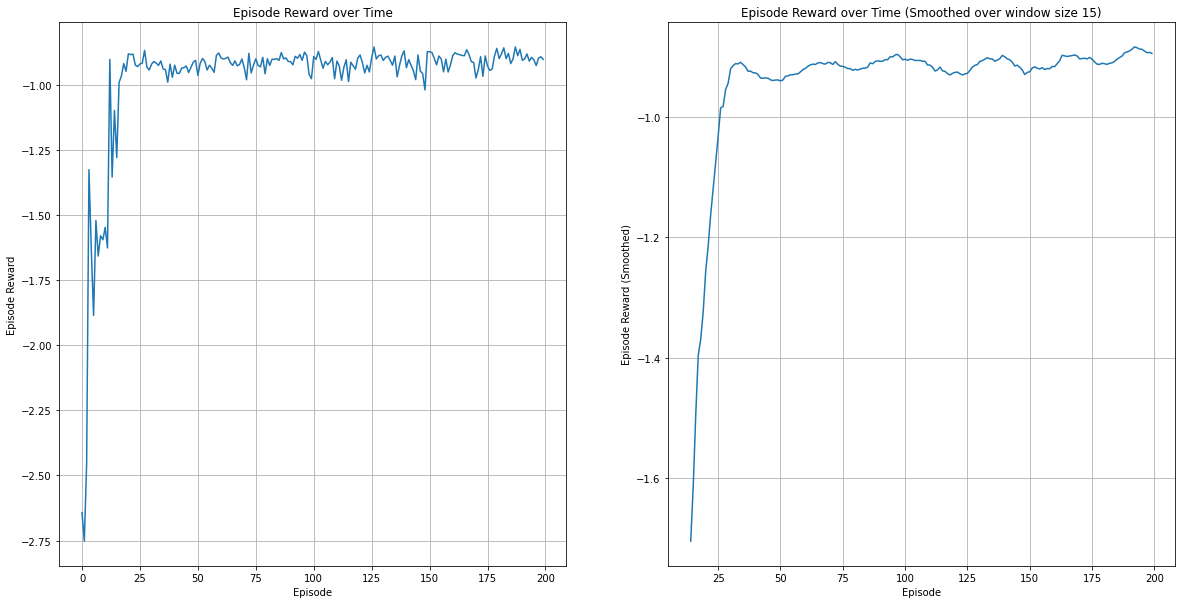

In [ ]:
print(f"Best reward during training: {max(stats_nn)}")
plot_episode_stats(stats_nn, 15)

> The results of the learning rate curve graph clearly show that the Q-Learning agent is learning and improving after training for 200 episodes. The agent initially starts with a reward value less than -1.6; however, quickly improves to have a reward value of around -0.9 in the first 40 episodes. Afterwards, the agent stays at a steady episode reward of around -0.89. Over the last 160 episodes, the agent improves gradually to reach the best reward value of -0.853.

> Overall, as the learning rate curve converges, it suggests that the agent has reached the best policy. However, as the agent has only been trained on 200 episodes, increasing the number of episodes to 1000+ might have led to a better policy to be found. Tweaking the hyperparameter such as epsilon further could have also increased the chance of finding a better policy. A larger epsilon value $\epsilon$ would have increased the chance of exploration at the start. After tuning the hyperparameters I found the hyperparameters $epsilon\_init=0.1, epsilon\_decay=0.995, epsilon\_min=0.001$ provided the best balance between exploration and exploitation for my Q-Learning agent.

In [ ]:
# set random seed before running simulator
set_seed(1)

Setting seed to 1


#### **Evaluating agents**

##### **Dummy agent**

In [ ]:
states_dummy = []
rewards_dummy = []
actions_dummy = []
done = False

s = env.reset() # reset the environment before using it and log the starting state
states_dummy.append(s)
while not done:    
    action = [0,0,0,0]
    s, r, done, i = env.step(action=0) # dummy agent doing action 0 (no-intervention)
    action[0] = 1
    actions_dummy.append(action)
    states_dummy.append(s)
    rewards_dummy.append(r)


##### **Random agent**

In [ ]:
states_random = []
actions_random = []
rewards_random = []
done = False

s = env.reset() # reset the environment before using it and log the starting state
states_random.append(s)

while not done:  
    action = [0,0,0,0]  
    action_taken = random_agent()
    s, r, done, i = env.step(action=action_taken) # random agent doing action_taken
    action[action_taken] = 1
    actions_random.append(action)
    states_random.append(s)
    rewards_random.append(r)


##### **Deterministic agent**

In [ ]:
states_determ = []
actions_determ = []
rewards_determ = []
done = False

s = env.reset() # reset the environment before using it and log the starting state
states_determ.append(s)

deterministic_agent.quarantine = 0 # initalising static vairable used in deterministic_agent

while not done:  
    action = [0,0,0,0]
    action_taken = deterministic_agent(states_determ)
    s, r, done, i = env.step(action=action_taken) # deterministic agent doing action_taken
    action[action_taken] = 1
    actions_determ.append(action)
    states_determ.append(s)
    rewards_determ.append(r)


##### **Q-Learning agent**

In [ ]:
# Intalise and load neural network model

model_nn = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
model_nn.model.load_weights("q_learning.h5") # must load the weights from q_learning.h5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
states_qlearn = []
actions_qlearn = []
rewards_qlearn = []
done = False

s = env.reset() # reset the environment before using it and log the starting state
states_qlearn.append(s)

while not done:  
    s = np.reshape(s/np.sum(s),[1,d_states])
    action = [0,0,0,0]
    act_values = model_nn.predict(s)[0]
    action_taken = np.argmax(act_values)
    s, r, done, i = env.step(action=action_taken) # Q-Learning agent doing action_taken
    action[action_taken] = 1
    actions_qlearn.append(action)
    states_qlearn.append(s)
    rewards_qlearn.append(r)



##### **Evaluating agent results**

Total reward for Dummy Agent is:  -1.5989584925141886
Total reward for Random Agent is:  -1.661740737923409
Total reward for Deterministic Agent is:  -0.8519031548623741
Total reward for Q-Learning Agent is:  -0.8079091286781759


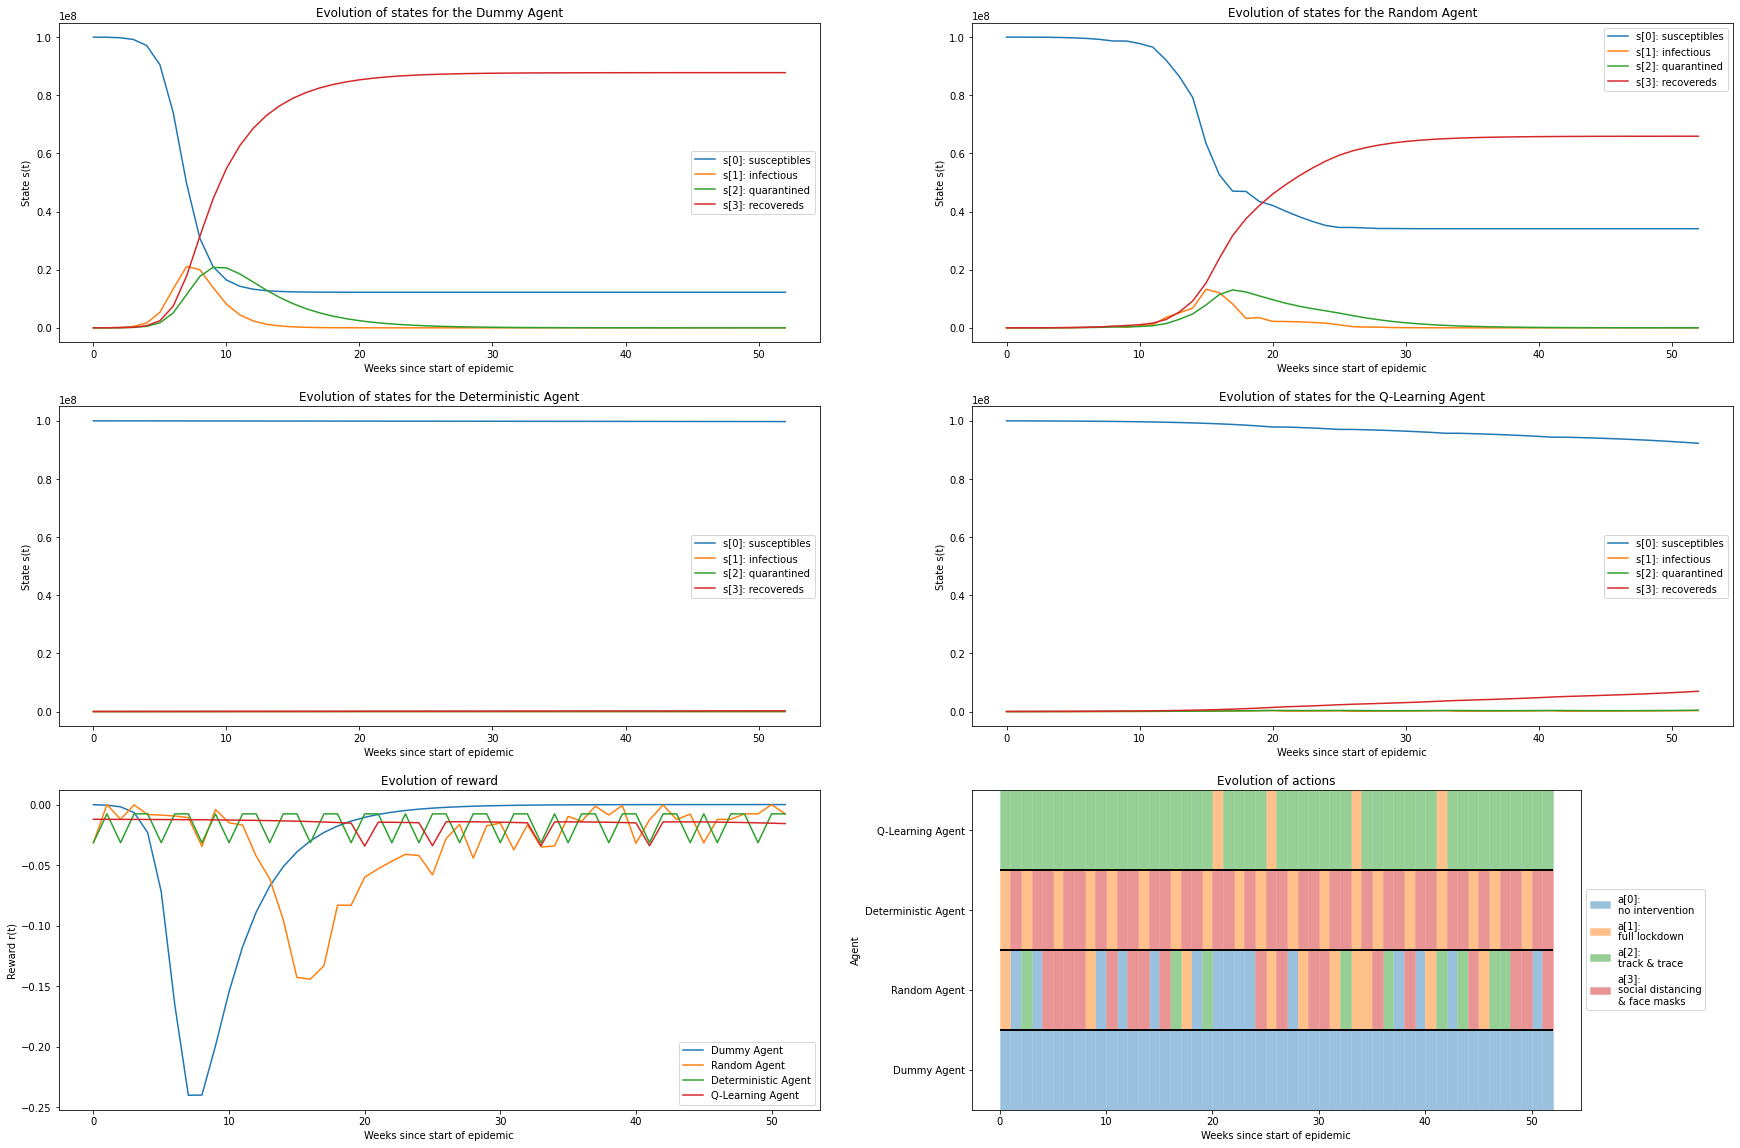

In [ ]:
states = [states_dummy,states_random,states_determ,states_qlearn]
actions = [actions_dummy,actions_random,actions_determ,actions_qlearn]
rewards = [rewards_dummy,rewards_random,rewards_determ,rewards_qlearn]

mandatory_plots(states,actions,rewards)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


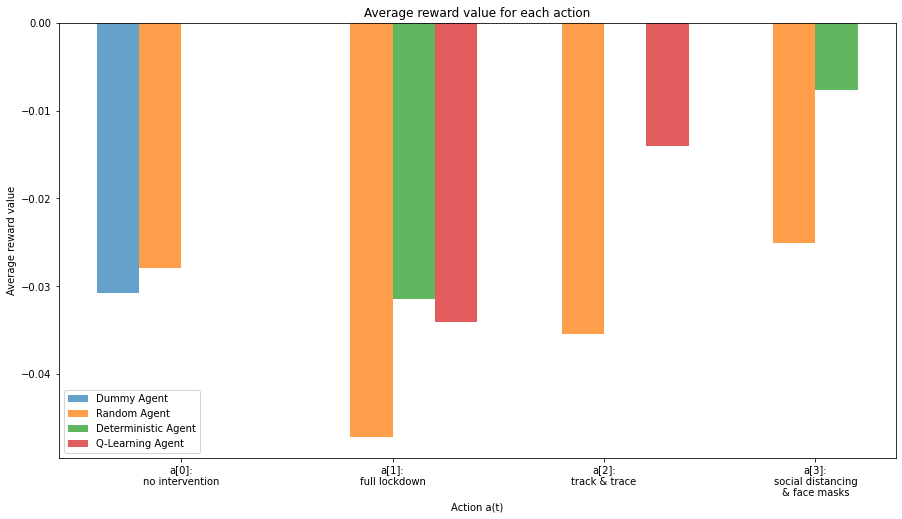

In [ ]:
plot_action_reward(actions, rewards)

> The results of running all four agents over 52 weeks using epidemic simulator in a deterministic environment, provide a clear picture on which agents performs the best policy. 

> The evolution of states for each agent shows as expected that the dummy agent results in the highest number of Covid cases. The dummy agent takes no action throughout the epidemic and is the base case for the other three agents. The results from the random agent show that the number of Covid cases decrease marginally; however, is still fairly high compared to the last two. 

> The deterministic agent has the best results of all three agents by the number of Covid cases occurring. The agent is able to prevent nearly all Covid cases leading to a very low infectious rate. However, this agent took the most extreme policy compared to the other three agents, by having 19 weeks of lockdown in total.

> Lastly, the Q-Learning agent results show the policy the agent took resulted in a greater number of Covid cases compared to the deterministic agent; however, greatly less than the random or dummy agent. The Q-Learning policy is a lot less extreme than the Deterministic agent policy. The majority of the actions taken over the 52 weeks are implementing track & trace system with 4 weeks where a full lockdown is implemented.

> The simpler policy of the Q-Learning agent also transpires on the evolution of reward graph. The reward value is the mostly constant, with a few 4 small  jumps lasting 1 week which occurs when a full lockdown happens. This leads to the agent having a total reward value of $-0.808$. The total reward value of the deterministic agent is $-0.852$, with more variety in the evolution of the reward value due to the policy of constantly changing the action taken between each week. Although the track and trace action has on average a slightly lower reward value than social distancing and face masks - which is the main other action the deterministic policy takes beside a full lockdown - as full lockdowns happen so few times in the Q-Learning policy in comparison to the deterministic policy, this has lead to a better overall reward value.

> The random and dummy agent total reward value is $-1.662$ and $-1.599$ respectively. Both of their evolution of rewards results in a large dip before converging near the end of the 52 weeks.

> The results have shown that the Q-Learning policy is the best compared to the other 3 agents in a deterministic case. It not only has the highest reward value, it also provides the simplest policy to implement and most likely to be successful and accepted by the general public, especially as the closest alternative results in a large number of lockdowns which can lead to unhappy citizens.

### ***Noisy environments***

> For the following evaluations, I ran each agent 7 times and found the mean and standard deviation for all statistics collected (states, rewards, actions). The selected action taken in the evolution of actions graph is the largest mean value for the possible actions, meaning the action was taken the most over the 7 episodes.

## 3.3 Determinitic ViRL problem with observational noise

In [ ]:
# set random seed before running simulator
set_seed(1)

Setting seed to 1


In [ ]:
env = virl.Epidemic(problem_id=4, noisy=True)

#### **Evaluating agents**

##### **Dummy agent**

In [ ]:
overall_states_dummy = []
overall_rewards_dummy = []
overall_actions_dummy = []

for i in range(7):
  states_dummy = []
  rewards_dummy = []
  actions_dummy = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_dummy.append(s)
  while not done:    
    action = [0,0,0,0]
    s, r, done, i = env.step(action=0) # dummy agent doing action 0 (no-intervention)
    action[0] = 1
    actions_dummy.append(action)
    states_dummy.append(s)
    rewards_dummy.append(r)
  
  overall_states_dummy.append(states_dummy)
  overall_rewards_dummy.append(rewards_dummy)
  overall_actions_dummy.append(actions_dummy)


In [ ]:
overall_states_dummy = np.array(overall_states_dummy)
mean_states_dummy = np.mean(overall_states_dummy, axis=0)
std_states_dummy = np.std(overall_states_dummy, axis = 0)


overall_rewards_dummy = np.array(overall_rewards_dummy)
mean_rewards_dummy = np.mean(overall_rewards_dummy, axis=0)
std_rewards_dummy = np.std(overall_rewards_dummy, axis = 0)


overall_actions_dummy = np.array(overall_actions_dummy)
mean_actions_dummy = np.mean(overall_actions_dummy, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_dummy)
temp[np.arange(len(mean_actions_dummy)), mean_actions_dummy.argmax(1)] = 1
mean_actions_dummy = temp

std_actions_dummy = np.std(overall_actions_dummy, axis = 0)

##### **Random agent**

In [ ]:
overall_states_random = []
overall_rewards_random = []
overall_actions_random = []

for i in range(7):
  states_random = []
  actions_random = []
  rewards_random = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_random.append(s)

  while not done:  
    action = [0,0,0,0]  
    action_taken = random_agent()
    s, r, done, i = env.step(action=action_taken) # random agent doing action_taken
    action[action_taken] = 1
    actions_random.append(action)
    states_random.append(s)
    rewards_random.append(r)

  overall_states_random.append(states_random)
  overall_rewards_random.append(rewards_random)
  overall_actions_random.append(actions_random)


In [ ]:
overall_states_random = np.array(overall_states_random)
mean_states_random = np.mean(overall_states_random, axis=0)
std_states_random = np.std(overall_states_random, axis = 0)


overall_rewards_random = np.array(overall_rewards_random)
mean_rewards_random = np.mean(overall_rewards_random, axis=0)
std_rewards_random = np.std(overall_rewards_random, axis = 0)


overall_actions_random = np.array(overall_actions_random)
mean_actions_random = np.mean(overall_actions_random, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_random)
temp[np.arange(len(mean_actions_random)), mean_actions_random.argmax(1)] = 1
mean_actions_random = temp

std_actions_random = np.std(overall_actions_random, axis = 0)

##### **Deterministic agent**

In [ ]:
overall_states_determ = []
overall_rewards_determ = []
overall_actions_determ = []

for i in range(7):
  states_determ = []
  actions_determ = []
  rewards_determ = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_determ.append(s)

  deterministic_agent.quarantine = 0 # initalising static vairable used in deterministic_agent

  while not done:  
    action = [0,0,0,0]
    action_taken = deterministic_agent(states_determ)
    s, r, done, i = env.step(action=action_taken) # deterministic agent doing action_taken
    action[action_taken] = 1
    actions_determ.append(action)
    states_determ.append(s)
    rewards_determ.append(r)

  overall_states_determ.append(states_determ)
  overall_rewards_determ.append(rewards_determ)
  overall_actions_determ.append(actions_determ)


In [ ]:
overall_states_determ = np.array(overall_states_determ)
mean_states_determ = np.mean(overall_states_determ, axis=0)
std_states_determ = np.std(overall_states_determ, axis = 0)


overall_rewards_determ = np.array(overall_rewards_determ)
mean_rewards_determ = np.mean(overall_rewards_determ, axis=0)
std_rewards_determ = np.std(overall_rewards_determ, axis = 0)


overall_actions_determ = np.array(overall_actions_determ)
mean_actions_determ = np.mean(overall_actions_determ, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_determ)
temp[np.arange(len(mean_actions_determ)), mean_actions_determ.argmax(1)] = 1
mean_actions_determ = temp

std_actions_determ = np.std(overall_actions_determ, axis = 0)

##### **Q-Learning agent**

In [ ]:
# Intalise and load neural network model

model_nn = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
model_nn.model.load_weights("q_learning.h5") # must load the weights from q_learning.h5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
overall_states_qlearn = []
overall_rewards_qlearn = []
overall_actions_qlearn = []

for i in range(7):
  states_qlearn = []
  actions_qlearn = []
  rewards_qlearn = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_qlearn.append(s)

  while not done:  
    s = np.reshape(s/np.sum(s),[1,d_states])
    action = [0,0,0,0]
    act_values = model_nn.predict(s)[0]
    action_taken = np.argmax(act_values)
    s, r, done, i = env.step(action=action_taken) # Q-Learning agent doing action_taken
    action[action_taken] = 1
    actions_qlearn.append(action)
    states_qlearn.append(s)
    rewards_qlearn.append(r)

  overall_states_qlearn.append(states_qlearn)
  overall_rewards_qlearn.append(rewards_qlearn)
  overall_actions_qlearn.append(actions_qlearn)



In [ ]:
overall_states_qlearn = np.array(overall_states_qlearn)
mean_states_qlearn = np.mean(overall_states_qlearn, axis=0)
std_states_qlearn = np.std(overall_states_qlearn, axis = 0)


overall_rewards_qlearn = np.array(overall_rewards_qlearn)
mean_rewards_qlearn = np.mean(overall_rewards_qlearn, axis=0)
std_rewards_qlearn = np.std(overall_rewards_qlearn, axis = 0)


overall_actions_qlearn = np.array(overall_actions_qlearn)
mean_actions_qlearn = np.mean(overall_actions_qlearn, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_qlearn)
temp[np.arange(len(mean_actions_qlearn)), mean_actions_qlearn.argmax(1)] = 1
mean_actions_qlearn = temp

std_actions_qlearn = np.std(overall_actions_qlearn, axis = 0)

##### **Evaluating agent results**

Total reward for Dummy Agent is:  -1.5989584925141886
Total reward for Random Agent is:  -1.5431882983897203
Total reward for Deterministic Agent is:  -0.8518533449341908
Total reward for Q-Learning Agent is:  -0.8087588282012219


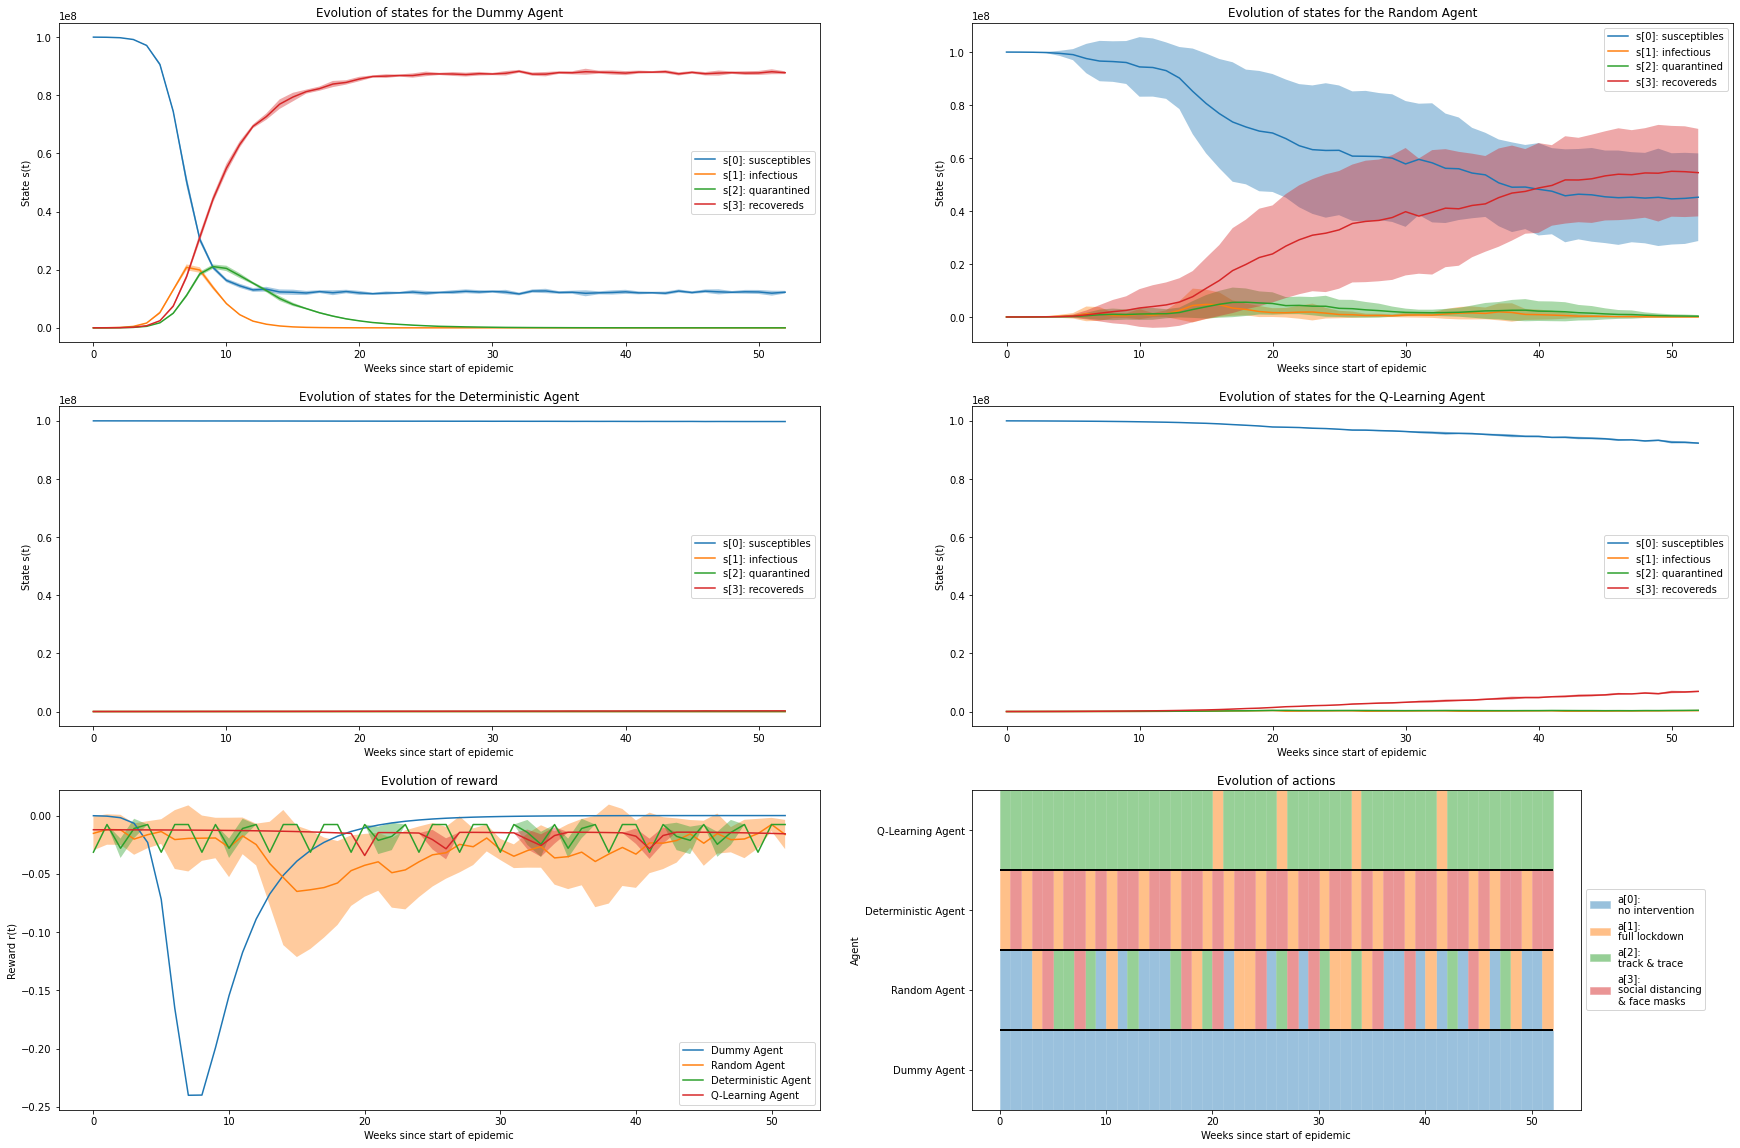

In [ ]:
states = [mean_states_dummy,mean_states_random,mean_states_determ,mean_states_qlearn]
actions = [mean_actions_dummy,mean_actions_random,mean_actions_determ,mean_actions_qlearn]
rewards = [mean_rewards_dummy,mean_rewards_random,mean_rewards_determ,mean_rewards_qlearn]

states_error = [std_states_dummy,std_states_random,std_states_determ,std_states_qlearn]
actions_error = [std_actions_dummy,std_actions_random,std_actions_determ,std_actions_qlearn]
rewards_error = [std_rewards_dummy,std_rewards_random,std_rewards_determ,std_rewards_qlearn]


mandatory_plots(states,actions,rewards, states_error=states_error, rewards_error=rewards_error)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


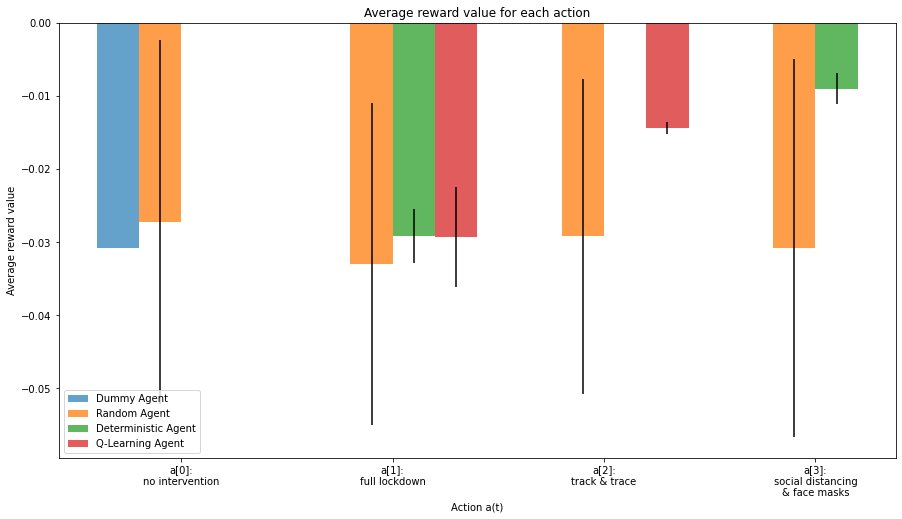

In [ ]:
plot_action_reward(actions, rewards, actions_error=actions_error)

> After running the agents with the same problem id but in a noisy environment, most agents behaved similarly to the deterministic environment. The evolution of states for each agent is almost identical to the deterministic environment and the standard deviation is small as well, meaning adding noise to the data has had little affect in reproducing similarly effective policies over the number of episodes. 

> The one exception to this case is the random agent which evolution of states is more varied with a greater standard deviation. As this is a random agent this isn't a surprise as actions are always going to be random.

> The actions taken by both the deterministic and Q-Learning agents are almost identical to the results of the same agents in the deterministic environment. The evolution of rewards graph also hardly changes for these two agents. Noise does affect both the agent by a small degree after implementing a full lockdown, however, this has little effect on the overall total reward value which is nearly identical to the deterministic environment.

## 3.4 Stochastic ViRL problem with observational noise


In [ ]:
# set random seed before running simulator
set_seed(1)

Setting seed to 1


In [ ]:
env = virl.Epidemic(stochastic=True, noisy=True)

#### **Evaluating agents**

##### **Dummy agent**

In [ ]:
overall_states_dummy = []
overall_rewards_dummy = []
overall_actions_dummy = []

for i in range(7):
  states_dummy = []
  rewards_dummy = []
  actions_dummy = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_dummy.append(s)
  while not done:    
    action = [0,0,0,0]
    s, r, done, i = env.step(action=0) # dummy agent doing action 0 (no-intervention)
    action[0] = 1
    actions_dummy.append(action)
    states_dummy.append(s)
    rewards_dummy.append(r)
  
  overall_states_dummy.append(states_dummy)
  overall_rewards_dummy.append(rewards_dummy)
  overall_actions_dummy.append(actions_dummy)


In [ ]:
overall_states_dummy = np.array(overall_states_dummy)
mean_states_dummy = np.mean(overall_states_dummy, axis=0)
std_states_dummy = np.std(overall_states_dummy, axis = 0)


overall_rewards_dummy = np.array(overall_rewards_dummy)
mean_rewards_dummy = np.mean(overall_rewards_dummy, axis=0)
std_rewards_dummy = np.std(overall_rewards_dummy, axis = 0)


overall_actions_dummy = np.array(overall_actions_dummy)
mean_actions_dummy = np.mean(overall_actions_dummy, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_dummy)
temp[np.arange(len(mean_actions_dummy)), mean_actions_dummy.argmax(1)] = 1
mean_actions_dummy = temp

std_actions_dummy = np.std(overall_actions_dummy, axis = 0)

##### **Random agent**

In [ ]:
overall_states_random = []
overall_rewards_random = []
overall_actions_random = []

for i in range(7):
  states_random = []
  actions_random = []
  rewards_random = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_random.append(s)

  while not done:  
    action = [0,0,0,0]  
    action_taken = random_agent()
    s, r, done, i = env.step(action=action_taken) # random agent doing action_taken
    action[action_taken] = 1
    actions_random.append(action)
    states_random.append(s)
    rewards_random.append(r)

  overall_states_random.append(states_random)
  overall_rewards_random.append(rewards_random)
  overall_actions_random.append(actions_random)


In [ ]:
overall_states_random = np.array(overall_states_random)
mean_states_random = np.mean(overall_states_random, axis=0)
std_states_random = np.std(overall_states_random, axis = 0)


overall_rewards_random = np.array(overall_rewards_random)
mean_rewards_random = np.mean(overall_rewards_random, axis=0)
std_rewards_random = np.std(overall_rewards_random, axis = 0)


overall_actions_random = np.array(overall_actions_random)
mean_actions_random = np.mean(overall_actions_random, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_random)
temp[np.arange(len(mean_actions_random)), mean_actions_random.argmax(1)] = 1
mean_actions_random = temp

std_actions_random = np.std(overall_actions_random, axis = 0)

##### **Deterministic agent**

In [ ]:
overall_states_determ = []
overall_rewards_determ = []
overall_actions_determ = []

for i in range(7):
  states_determ = []
  actions_determ = []
  rewards_determ = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_determ.append(s)

  deterministic_agent.quarantine = 0 # initalising static vairable used in deterministic_agent

  while not done:  
    action = [0,0,0,0]
    action_taken = deterministic_agent(states_determ)
    s, r, done, i = env.step(action=action_taken) # deterministic agent doing action_taken
    action[action_taken] = 1
    actions_determ.append(action)
    states_determ.append(s)
    rewards_determ.append(r)

  overall_states_determ.append(states_determ)
  overall_rewards_determ.append(rewards_determ)
  overall_actions_determ.append(actions_determ)


In [ ]:
overall_states_determ = np.array(overall_states_determ)
mean_states_determ = np.mean(overall_states_determ, axis=0)
std_states_determ = np.std(overall_states_determ, axis = 0)


overall_rewards_determ = np.array(overall_rewards_determ)
mean_rewards_determ = np.mean(overall_rewards_determ, axis=0)
std_rewards_determ = np.std(overall_rewards_determ, axis = 0)


overall_actions_determ = np.array(overall_actions_determ)
mean_actions_determ = np.mean(overall_actions_determ, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_determ)
temp[np.arange(len(mean_actions_determ)), mean_actions_determ.argmax(1)] = 1
mean_actions_determ = temp

std_actions_determ = np.std(overall_actions_determ, axis = 0)

##### **Q-Learning agent**

In [ ]:
# Intalise and load neural network model

model_nn = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
model_nn.model.load_weights("q_learning.h5") # must load the weights from q_learning.h5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
overall_states_qlearn = []
overall_rewards_qlearn = []
overall_actions_qlearn = []

for i in range(7):
  states_qlearn = []
  actions_qlearn = []
  rewards_qlearn = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_qlearn.append(s)

  while not done:  
    s = np.reshape(s/np.sum(s),[1,d_states])
    action = [0,0,0,0]
    act_values = model_nn.predict(s)[0]
    action_taken = np.argmax(act_values)
    s, r, done, i = env.step(action=action_taken) # Q-Learning agent doing action_taken
    action[action_taken] = 1
    actions_qlearn.append(action)
    states_qlearn.append(s)
    rewards_qlearn.append(r)

  overall_states_qlearn.append(states_qlearn)
  overall_rewards_qlearn.append(rewards_qlearn)
  overall_actions_qlearn.append(actions_qlearn)



In [ ]:
overall_states_qlearn = np.array(overall_states_qlearn)
mean_states_qlearn = np.mean(overall_states_qlearn, axis=0)
std_states_qlearn = np.std(overall_states_qlearn, axis = 0)


overall_rewards_qlearn = np.array(overall_rewards_qlearn)
mean_rewards_qlearn = np.mean(overall_rewards_qlearn, axis=0)
std_rewards_qlearn = np.std(overall_rewards_qlearn, axis = 0)


overall_actions_qlearn = np.array(overall_actions_qlearn)
mean_actions_qlearn = np.mean(overall_actions_qlearn, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_qlearn)
temp[np.arange(len(mean_actions_qlearn)), mean_actions_qlearn.argmax(1)] = 1
mean_actions_qlearn = temp

std_actions_qlearn = np.std(overall_actions_qlearn, axis = 0)

##### **Evaluating agent results**

Total reward for Dummy Agent is:  -1.4342883961451618
Total reward for Random Agent is:  -1.8131029320450374
Total reward for Deterministic Agent is:  -1.002095804751664
Total reward for Q-Learning Agent is:  -1.335725918423455


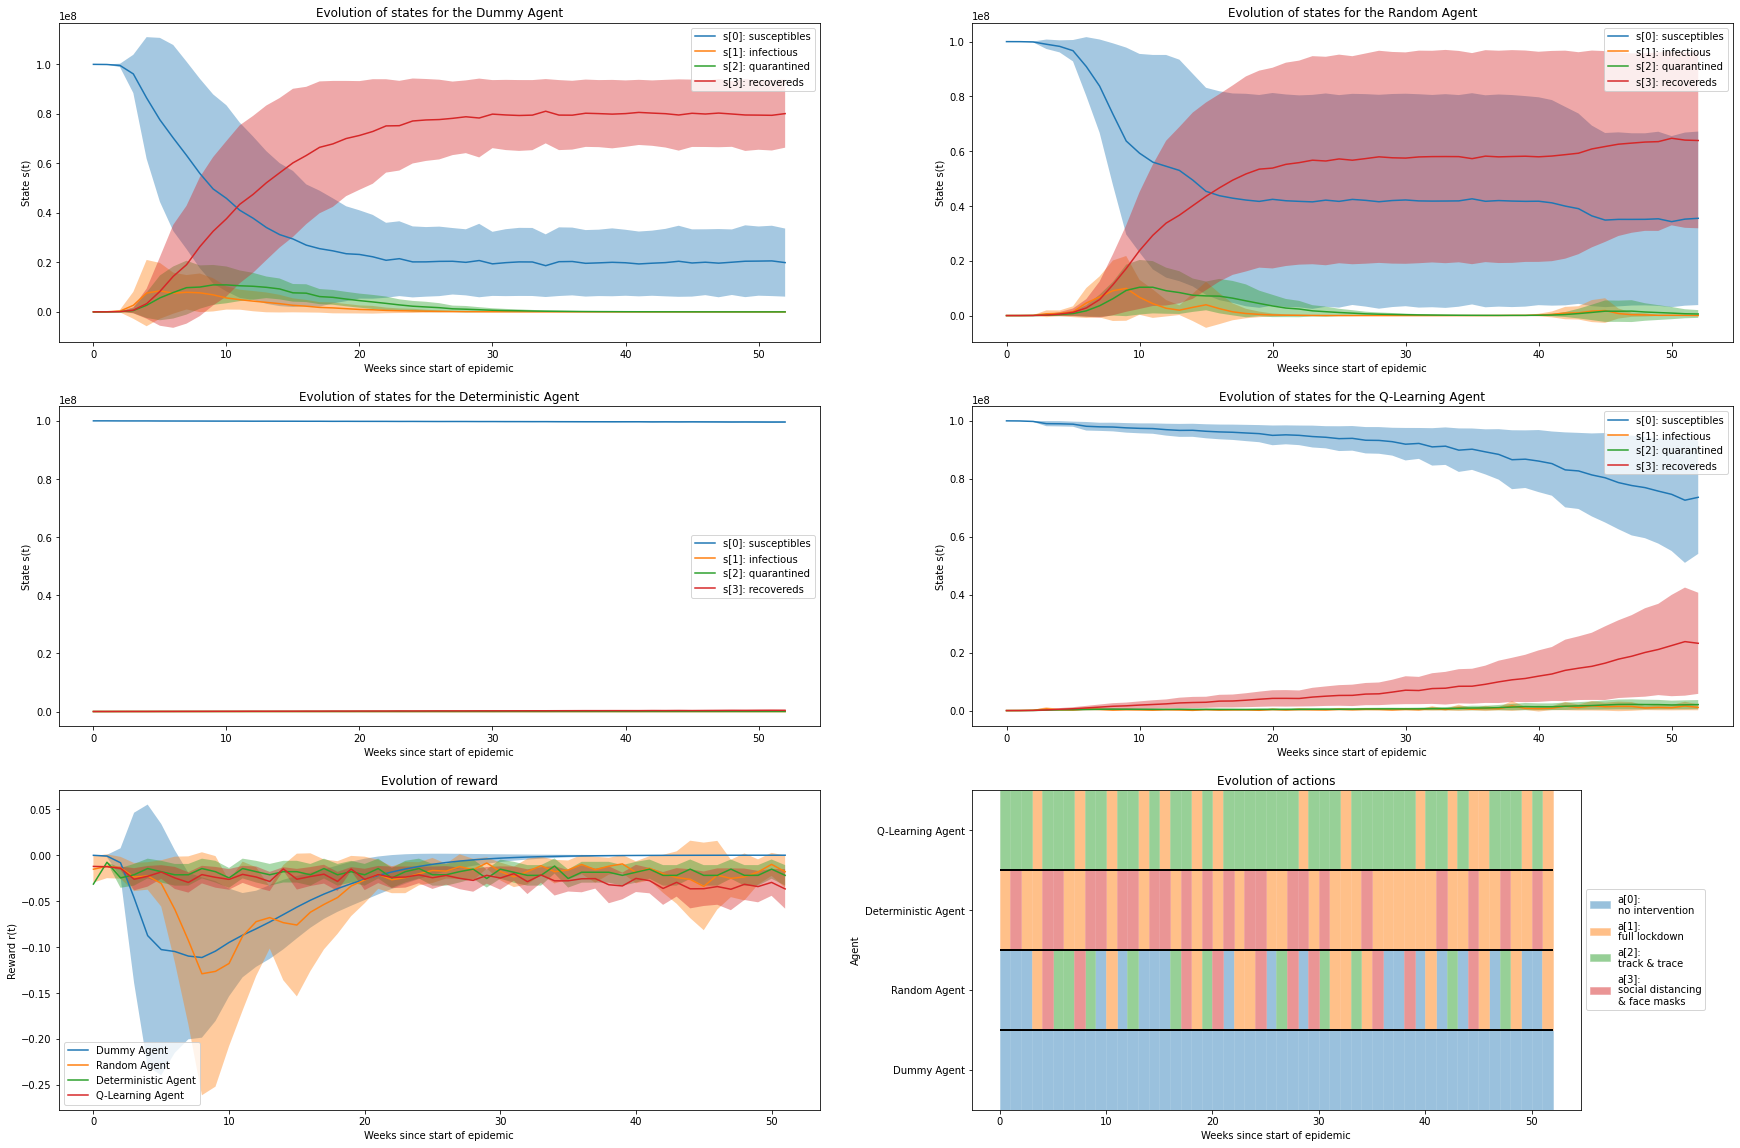

In [ ]:
states = [mean_states_dummy,mean_states_random,mean_states_determ,mean_states_qlearn]
actions = [mean_actions_dummy,mean_actions_random,mean_actions_determ,mean_actions_qlearn]
rewards = [mean_rewards_dummy,mean_rewards_random,mean_rewards_determ,mean_rewards_qlearn]

states_error = [std_states_dummy,std_states_random,std_states_determ,std_states_qlearn]
actions_error = [std_actions_dummy,std_actions_random,std_actions_determ,std_actions_qlearn]
rewards_error = [std_rewards_dummy,std_rewards_random,std_rewards_determ,std_rewards_qlearn]


mandatory_plots(states,actions,rewards, states_error=states_error, rewards_error=rewards_error)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


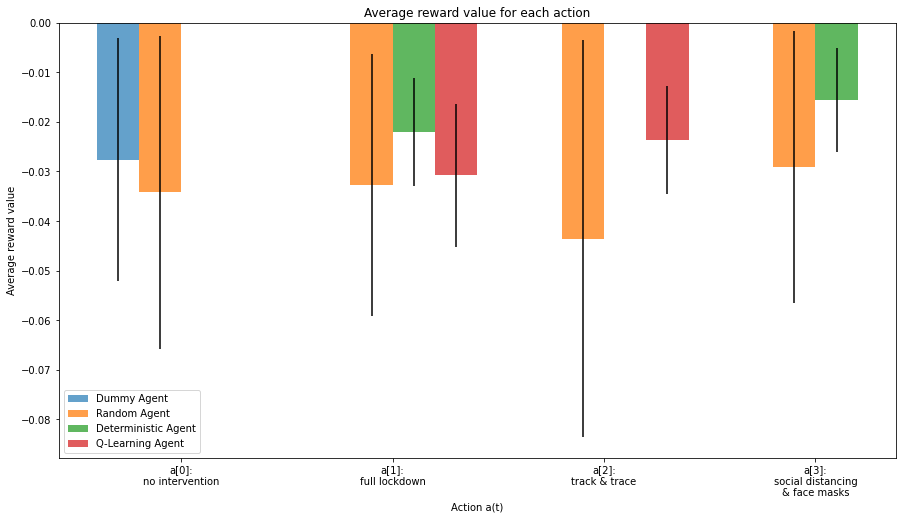

In [ ]:
plot_action_reward(actions, rewards, actions_error=actions_error)

> The results of running the agents on the noisy stochastic environment show that all the agents are negatively affected from the randomness of the environment.

> The dummy agents evolution of states shows the variability of the state values while running in a stochastic environment while only taking the same actions over 7 episodes. This same affect did not occur in the noisy environment in problem id 4 which the agents were able to mitigate most of the noise. As expected, this had lead to further variableness in the random agent as the random agent is only taking random actions, however, has resulted in the worst total reward score of $-1.813$ on average over 7 episodes in the stochastic environment. 

> The Q-Learning agent has also been negatively affected by the randomness of the environment. Not only is there a greater spread of states over the 7 episodes, on average the number of number of Covid cases occurring increased. This has resulted in the agent taking more extreme actions with 15 days of full lockdown and only receiving a score of just $-1.336$ on average over the 7 episodes the agent ran on. 

> On the other hand, the deterministic agent has successfully been able to mitigate the effect of the noise and randomness of the environment. Due to the extreme nature of the agent, it has managed to stop the spread of Covid-19 by taking the action of full lockdown when there are more than 5900 infectious people, however, this has lead to 30 days of full lockdown. The agent has managed to score a total reward score of $-1.002$ making it the best agent in the stochastic environment. This came at a price with its extreme policies taken.



## 3.5 Improving generalization performance

> To improve my Q-Learning agent in the stochastic noisy environment I looked at extending the state space so the agent had more data to use while training and making prediction. I decided to modify my state space to include the current state and the states from the last two time stamps back.

>I decided to do this because I found due to the randomness of the stochastic environment, more data, specifically data from the last couple of time stamps, can provide the agent with a better understanding of the current circumstances in the environment and discover trends.

>I implemented this solution by modifying the original Q-Learning agent script to include previous states in the state space when making predictions using the function approximation. The input shape for the neural networks has been changed to except a 1,12 state array shape *(current_state [4], prev_state_1 [4], prev_state_2 [4])*. The replay buffer has also been modified to store the last two previous states as part of the memory. The previous states can be accessed like any other object in the Transition namedtuple when a batch is created.

In [ ]:
Transition = namedtuple('Transition',
                        ('state','previous_state_2', 'previous_state_1', 'action', 'next_state', 'reward','is_not_terminal_state'))

class ReplayMemory():
    """
    Implement a replay buffer using the deque collection
    """

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = deque(maxlen=capacity)   
        self.previous_1 = np.zeros((1, 4))
        self.previous_2 = np.zeros((1, 4))

    def push(self, state, action, next_state, reward, is_not_terminal_state):
        """Saves a transition."""
        self.memory.append(Transition(state, self.previous_2, self.previous_1, action, next_state, reward, is_not_terminal_state))

        self.previous_1 = self.previous_2
        self.previous_2 = state


    def pop(self):
        return self.memory.pop()

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)   

    def __len__(self):
        return len(self.memory)

In [ ]:
# Keep track of some stats
EpisodeStats = namedtuple("Stats",["episode_rewards"])

# Main Q-learner
def q_learning_nn_state(env, func_approximator, func_approximator_target, num_episodes,discount_factor=0.95, epsilon_init=0.01, epsilon_decay=0.99995,epsilon_min=0.01,use_batch_updates=True, fn_model_in=None, fn_model_out=None):
    """
    Q-Learning algorithm for Q-learning using Function Approximations.
    Finds the optimal greedy policy while following an explorative greedy policy.
    Stores last two previous states which are used in prediction
    
    Args:
        env: OpenAI environment.
        func_approximator: Action-Value function estimator, behavior policy (i.e. the function which determines the next action)
        func_approximator_target: Action-Value function estimator, updated less frequenty than the behavior policy 
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        epsilon_init: Exploration strategy; chance the sample a random action. Float between 0 and 1.
        epsilon_decay: Each episode, epsilon is decayed by this factor
        epislon_min: Min epsilon value        
        use_batch_updates=True, 
        fn_model_in: Load the model from the file if not None
        fn_model_out: File name of the saved model, saves the best model in the last 100 episodes

    Returns:
        An EpisodeStats object with a numpy array for episode_rewards.
    """
        
    memory = ReplayMemory(BUFFER_SIZE) # init the replay memory    
    n_actions = env.action_space.n        
    d_states  = env.observation_space.shape[0]    
    best_reward = -sys.maxsize - 1

    # Synch the target and behavior network
    if not fn_model_in is None:
        func_approximator.model.load_weights(fn_model_in)
    func_approximator_target.model.set_weights(func_approximator.model.get_weights())

    # Keeps track of useful statistics
    stats = EpisodeStats(
        episode_rewards=np.zeros(num_episodes))            

    epsilon = epsilon_init

    # Previous states
    previous_1 = np.zeros((1, 4))
    previous_2 = np.zeros((1, 4))
    

    for i_episode in range(num_episodes):
        sys.stdout.flush()
               
        # Reset the environment and pick the first action
        state = env.reset()
        state = np.reshape(state/np.sum(state),[1,d_states]) # normalise and reshape to the a 1xd_state numpy array
        done = False
        
        # One step in the environment
        while not done:

            # Select an action and epsilon greedy policy based on the main behavior network
            if np.random.rand() <= epsilon:
                action = random.randrange(n_actions)
            else:
                concat_state = np.array([np.concatenate((state,previous_2,previous_1)).ravel()])
                act_values = func_approximator.predict(concat_state)[0]
                action = np.argmax(act_values)  # returns action                        
            
            # Take a step            
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state/np.sum(next_state),[1,d_states]) # normalise and reshape to the a 1xd_state numpy array                       
            
            # Add observation to the replay buffer
            if done:
                memory.push(state, action, next_state, reward, 0.0)            
            else:
                memory.push(state, action, next_state, reward, 1.0)            
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
                     
            # Update network (if learning is on, i.e. alpha>0 and we have enough samples in memory)
            if func_approximator.alpha > 0.0 and len(memory) >= BATCH_SIZE:                         
                # Fetch a batch from the replay buffer and extract as numpy arrays 
                transitions = memory.sample(BATCH_SIZE)            
                batch = Transition(*zip(*transitions))                                
                train_rewards = np.array(batch.reward)
                train_states = np.array(batch.state)
                train_prev_states_2 = np.array(batch.previous_state_2)
                train_prev_states_1 = np.array(batch.previous_state_1)
                train_next_state = np.array(batch.next_state)
                train_actions = np.array(batch.action)
                train_is_not_terminal_state = np.array(batch.is_not_terminal_state) 


                if(use_batch_updates):
                    # Do a single gradient step computed based on the full batch
                    train_states_reshape = train_states.reshape(BATCH_SIZE,d_states)
                    train_prev_states_2_reshape = train_prev_states_2.reshape(BATCH_SIZE,d_states)
                    train_prev_states_1_reshape = train_prev_states_1.reshape(BATCH_SIZE,d_states)

                    concat_train_states = np.concatenate((train_states_reshape,train_prev_states_2_reshape, train_prev_states_1_reshape), axis=1)
                    
                    train_next_state_reshape = train_next_state.reshape(BATCH_SIZE,d_states)
                    
                    concat_train_next_states = np.concatenate((train_next_state_reshape, train_states_reshape,train_prev_states_2_reshape), axis=1)

                    train_td_targets    = func_approximator.predict(concat_train_states) # predict current values for the given states
                    q_values_next       = func_approximator_target.predict(concat_train_next_states)                    
                    train_td_targetstmp = train_rewards + discount_factor * train_is_not_terminal_state * np.amax(q_values_next,axis=1)                
                    train_td_targets[ (np.arange(BATCH_SIZE), train_actions.reshape(BATCH_SIZE,).astype(int))] = train_td_targetstmp                                                                              
                    func_approximator.update(concat_train_states, train_td_targets) # Update the function approximator using our target       
                else:
                    # Do update in a truely online sense where a gradient step is performed per observation
                    for s in range(train_rewards.shape[0]):
                        concat_train_states = np.array([np.concatenate((train_states[s],train_prev_states_2[s], train_prev_states_1[s])).ravel()])   
                        #print(concat_train_states.shape)                     
                        target = func_approximator.predict(concat_train_states)[0]
                        concat_train_next_states = np.array([np.concatenate((train_next_state[s], train_states[s],train_prev_states_2[s])).ravel()])
                        #print(concat_train_next_states.shape)                     
                        q_next = func_approximator_target.predict(concat_train_next_states)[0]
                        target[train_actions[s]] = train_rewards[s] + discount_factor * train_is_not_terminal_state[s] * np.amax(q_next)                        
                        func_approximator.update(concat_train_states, target.reshape(1,n_actions)) # Update the function approximator using our target                                            
                if epsilon > epsilon_min:
                    epsilon *= epsilon_decay
            

            previous_1 = previous_2
            previous_2 = state
            state = next_state                
            
            
            if done:
                # Synch the target and behavior network
                func_approximator_target.model.set_weights(func_approximator.model.get_weights())
              
                # Save the best model so far    
                if fn_model_out is not None and (stats.episode_rewards[i_episode] >= best_reward):
                    func_approximator.model.save_weights(fn_model_out)
                    best_reward = stats.episode_rewards[i_episode]

                print("\repisode: {}/{}, score: {}, epsilon: {:.2}, best reward:{}".format(i_episode, num_episodes, stats.episode_rewards[i_episode], epsilon, best_reward), end="")                               
                
                break

    return stats.episode_rewards, best_reward


In [ ]:
d_states    = env.observation_space.shape[0]*3
n_actions   = env.action_space.n

alpha       = 0.001   # learning rate/stepsize
nn_config   = [24,24] # size of the hidden layers in the MLP 
BATCH_SIZE  = 128     # number rof samples in a batch
BUFFER_SIZE = 10000   # size of the replay buffer

In [ ]:
# set random seed training the Q-Learing agent
set_seed(1)

Setting seed to 1


In [ ]:
env = virl.Epidemic(stochastic=True, noisy=True)

#### **Training improved Q-Learning agent**

##### **Training the agent**

In [ ]:
# Init the two networks
nn_func_approximator = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
nn_func_approximator_target = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
"""
Uncomment to run Q-Learning agent training 
"""

# env.reset()

# stats_nn_prev_state, best_reward_nn_prev_state = q_learning_nn_state(env,nn_func_approximator, nn_func_approximator_target, 300, 
#                       epsilon_init=0.1, epsilon_decay=0.995, epsilon_min=0.001, use_batch_updates=True, 
#                       fn_model_in=None, fn_model_out="q_learning_prev_state.h5")


'\nUncomment to run Q-Learning agent training \n'

##### **Pickle stats_nn**

In [ ]:
# Write to file

# with open('stats_nn_prev_state.pickle', 'wb') as fp:
#     pickle.dump(stats_nn_prev_state, fp)

In [ ]:
# Read stats from file

with open('stats_nn_prev_state.pickle', 'rb') as fp:
    stats_nn_prev_state = pickle.load(fp)

Best reward during training: -0.14132173803460282


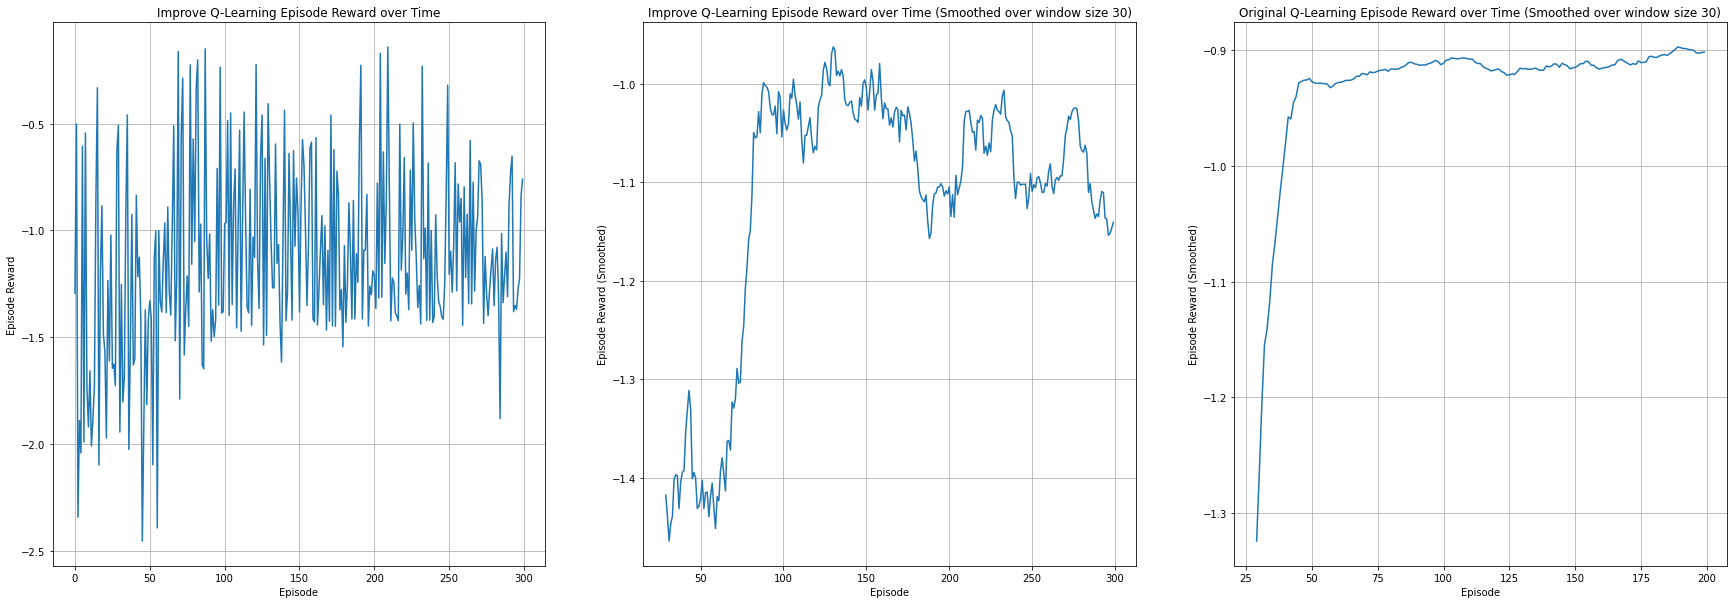

In [ ]:
print(f"Best reward during training: {max(stats_nn_prev_state)}")
plot_episode_stats(stats_nn_prev_state, 30, stats_nn)

> Due to the stochastic nature of the environment I increased the number of episodes which the improved Q-Learning agent trains on to $300$. The results of the learning rate curve graph show that the improved Q-Learning agent is learning, however, due to the randomness and noisiness of the data, the agent isn't learning as well as the original Q-Learning agent was in the deterministic environment.

>The agent initially starts with a reward value of just below $-1.4$ and similarly to the original Q-Learning agent, the reward value quickly improves to $-1.0$. The agent is unable to converge, however, stays on average in the range of around $-1.0$ and $-1.2$, after the reward data is smoothed, for the remainder of the training episodes. The improved Q-Learning agent in the end receives a best reward score of $-0.141$. 

>Overall, training the agent was not as successful as the original Q-Learning agent was because the learning rate curve never converged. I believe training on more episodes, such as (1000-2000+), would have resulted in the learning rate curve to converge as 300 episodes was too few to see the agent learning rate curve converge. However, the training did show that the agent was learning and did improve from the start.

#### **Evaluating agents**

##### **Improved Q-Learning agent**

In [ ]:
# set random seed before running simulator
set_seed(1)

Setting seed to 1


In [ ]:
env = virl.Epidemic(stochastic=True, noisy=True)

In [ ]:
# Intalise and load neural network model

model_nn = NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
model_nn.model.load_weights("q_learning_prev_state.h5") # must load the weights from q_learning_prev_state.h5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
overall_states_qlearn_prev = []
overall_rewards_qlearn_prev = []
overall_actions_qlearn_prev = []

for i in range(7):
  states_qlearn = []
  actions_qlearn = []
  rewards_qlearn = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_qlearn.append(s)

  previous_1 = np.zeros((1, 4))
  previous_2 = np.zeros((1, 4))

  while not done:  
    s = np.reshape(s/np.sum(s),[1,4])
    #print(s.shape,previous_2.shape,previous_1.shape)
    concat_s = np.array([np.concatenate((s,previous_2,previous_1)).ravel()])
    s_prev = s
    action = [0,0,0,0]
    act_values = model_nn.predict(concat_s)[0]
    action_taken = np.argmax(act_values)
    s, r, done, i = env.step(action=action_taken) # Q-Learning agent doing action_taken
    action[action_taken] = 1
    actions_qlearn.append(action)
    states_qlearn.append(s)
    rewards_qlearn.append(r)
    previous_1 = previous_2
    previous_2 = s_prev

  overall_states_qlearn_prev.append(states_qlearn)
  overall_rewards_qlearn_prev.append(rewards_qlearn)
  overall_actions_qlearn_prev.append(actions_qlearn)



In [ ]:
overall_states_qlearn_prev = np.array(overall_states_qlearn_prev)
mean_states_qlearn_prev = np.mean(overall_states_qlearn_prev, axis=0)
std_states_qlearn_prev = np.std(overall_states_qlearn_prev, axis = 0)


overall_rewards_qlearn_prev = np.array(overall_rewards_qlearn_prev)
mean_rewards_qlearn_prev = np.mean(overall_rewards_qlearn_prev, axis=0)
std_rewards_qlearn_prev = np.std(overall_rewards_qlearn_prev, axis = 0)


overall_actions_qlearn_prev = np.array(overall_actions_qlearn_prev)
mean_actions_qlearn_prev = np.mean(overall_actions_qlearn_prev, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_qlearn_prev)
temp[np.arange(len(mean_actions_qlearn_prev)), mean_actions_qlearn_prev.argmax(1)] = 1
mean_actions_qlearn_prev = temp

std_actions_qlearn_prev = np.std(overall_actions_qlearn_prev, axis = 0)

##### **Standard Q-Learning agent**

In [ ]:
# Intalise and load neural network model

model_nn = NNFunctionApproximatorJointKeras(alpha, 4, n_actions, nn_config)
model_nn.model.load_weights("q_learning.h5") # must load the weights from q_learning.h5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
overall_states_qlearn = []
overall_rewards_qlearn = []
overall_actions_qlearn = []

for i in range(7):
  states_qlearn = []
  actions_qlearn = []
  rewards_qlearn = []
  done = False

  s = env.reset() # reset the environment before using it and log the starting state
  states_qlearn.append(s)

  while not done:  
    s = np.reshape(s/np.sum(s),[1,4])
    action = [0,0,0,0]
    act_values = model_nn.predict(s)[0]
    action_taken = np.argmax(act_values)
    s, r, done, i = env.step(action=action_taken) # Q-Learning agent doing action_taken
    action[action_taken] = 1
    actions_qlearn.append(action)
    states_qlearn.append(s)
    rewards_qlearn.append(r)

  overall_states_qlearn.append(states_qlearn)
  overall_rewards_qlearn.append(rewards_qlearn)
  overall_actions_qlearn.append(actions_qlearn)



In [ ]:
overall_states_qlearn = np.array(overall_states_qlearn)
mean_states_qlearn = np.mean(overall_states_qlearn, axis=0)
std_states_qlearn = np.std(overall_states_qlearn, axis = 0)

overall_rewards_qlearn = np.array(overall_rewards_qlearn)
mean_rewards_qlearn = np.mean(overall_rewards_qlearn, axis=0)
std_rewards_qlearn = np.std(overall_rewards_qlearn, axis = 0)

overall_actions_qlearn = np.array(overall_actions_qlearn)
mean_actions_qlearn = np.mean(overall_actions_qlearn, axis=0)

# Set the highest mean for each row as the taken action 
temp = np.zeros_like(mean_actions_qlearn)
temp[np.arange(len(mean_actions_qlearn)), mean_actions_qlearn.argmax(1)] = 1
mean_actions_qlearn = temp

std_actions_qlearn = np.std(overall_actions_qlearn, axis = 0)

##### **Evaluating agent results**

Total reward for Q-Learning Agent is:  -1.0163353926162824
Total reward for Improved
Q-Learning Agent is:  -0.7400061536535762


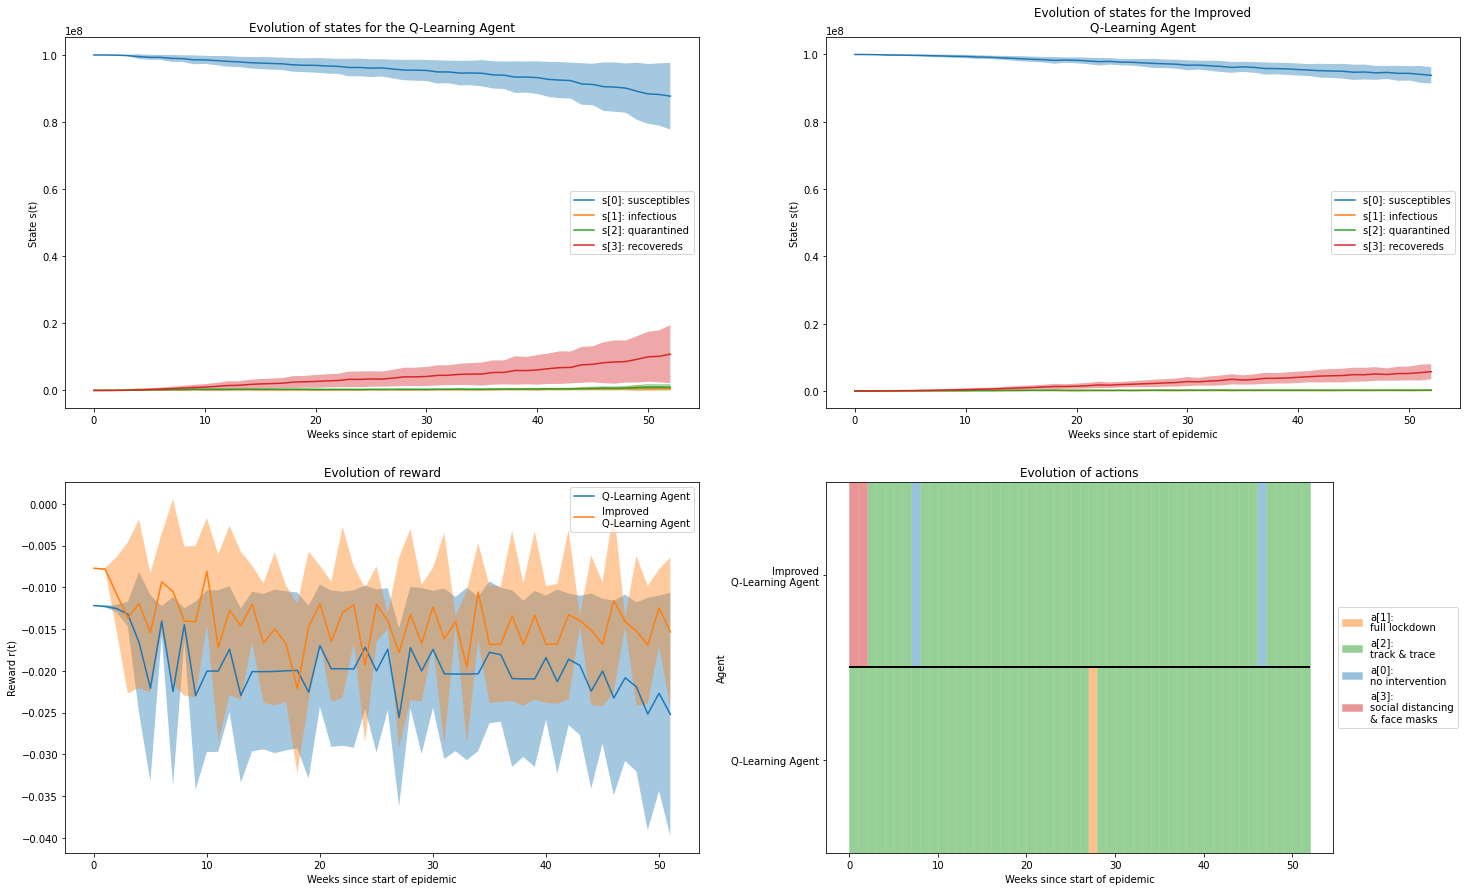

In [ ]:
states = [mean_states_qlearn,mean_states_qlearn_prev]
actions = [mean_actions_qlearn,mean_actions_qlearn_prev]
rewards = [mean_rewards_qlearn,mean_rewards_qlearn_prev]

states_error = [std_states_qlearn,std_states_qlearn_prev]
actions_error = [std_actions_qlearn,std_actions_qlearn_prev]
rewards_error = [std_rewards_qlearn,std_rewards_qlearn_prev]


mandatory_plots(states,actions,rewards, states_error=states_error, rewards_error=rewards_error)

> After running the improved Q-Learning agent and the original Q-Learning agent again in the stochastic environment for 52 weeks, the results show that the improved Q-Learning agent has managed to improve compared to the original Q-Learning agent.

> The evolution of states show that there is less variability in the state value, meaning the standard deviation is smaller, compared to the original Q-Learning agent. The number of Covid cases is also lower in the improved agent compared to the original while also taking a less extreme policy which included no full lockdowns, compared to the original Q-Learning agent. The evolution of reward graph shows that the average reward value for each week is always steadily higher compared to the original Q-Learning agent, with the agent receiving a total reward score of $-0.740$ on average over the 7 episodes. The original Q-Learning agent only received a  total reward score of $-1.016$ on average.

> The results from the improved Q-Learning agent was better than I was expecting after training the agent. I was expecting closer total reward values on average due to improve Q-Learning agent not learning as well as hoped. However, the results show that extending the state space can improve the Q-Learning agent in a stochastic environment. A large weakness in this experimental design is that the original Q-Learning agent has not been trained on the stochastic environment which could effect the internal validity of the results. 

# 4. Real-world reflection

***Could the optimal policies you developed in this work be used to inform decision making by politicians?***

> In my opinion none of the policies developed in this coursework could not be fully used to inform decisions made by politicians, however, they could provide a very basic guidance of possible trends in the epidemic. Although the policies developed did help to reduce the number of Covid cases in the simulated epidemic environment, too many more variables are needed to be simulated in the environment to give a greater accurate picture of the performance of each policy. The simulator should take into account the random chance of mutation of Covid which results in greater spread in certain mutations; current Covid mitigation polices abroad which might have a greater Covid spread risk; citizens getting bored of Covid restrictions over time resulting in more citizens breaking the rules; Covid transmission by age group; Covid vaccine take up; and others. Some of these circumstances could be hard to simulate and could make it hard to implement.

> If the simulator did take into account more specific circumstance, a greater number of statistics could be returned by the simulator every week, including the number of Covid cases from abroad, number of Covid cases by different age groups and the number of citizens which have taken the Covid vaccine. This would allow governments to possibly make more specific actions and target specific people, leading to less citizens requiring to follow the most severe Covid actions, such as full lockdown, and leading to citizens less likely to break the rules.

> The policies that were developed by the agents after simulating the agents in the three environments, provided a varied look at the different possibilities and actions governments could take. Although both the deterministic and Q-Learning policies do lower Covid transmission and result in good reward values, only the Q-Learning policies could be really used effectively by a government to make decisions. The deterministic policy was always the most severe policy between the two agents and requires the greatest number of lockdowns. The main strategy of this agent is to stop the spread of Covid at all costs, even if that results in constant lockdowns. This type of policy is not widely excepted by most people and often results in the greatest number of people breaking the rules after consecutive full lockdowns. However, certain countries, such as Australia and New Zealand, have adopted policies similar to policies the deterministic agent produces. Often when there are few positive Covid cases, the whole country/territory would go on a full lockdown until there are no more positive Covid cases. This strategy has been found very successful and kept both countries overall Covid cases low, however, is hard to implement successfully in a large number of countries. The Q-Learning policies are a lot less extreme and would be more easily adopted by a countries citizens.

> Although artificial intelligence is a helpful way to make decisions with many different variables involved, it will never be able to truly understand the decisions it is making. With Covid restrictions effecting everyone's lives and possibly having a major effects on peoples livelihoods, any policy created by an AI agent should be only used to inform human decision makers instead of informing the policy to be taken. Even the best policy which an AI agent comes up with, isn't necessarily the best policy to be taken by governments. 

# 5. Discussion

> Through this coursework, I have learnt how difficult training AI agents, such as Q-Learning, can be and how different environment conditions can have different effects on the policies the agents choose. Choosing the right hyperparameters can often be difficult task to do correctly even while being systematic. 

> A major limitation with my current evaluation approach was not retraining my Q-Learning agent after changing the environment. Ideally I would have liked to retrain my agent at every stage of the evaluation so I could provide the most accurate evaluation of the current environment which I am testing on. I would have also preferably trained my Q-Learning agent for a longer number of episodes, ideally 1000+. Although my original Q-Learning agent did learn fairly effectively with only 200 episodes, my improved Q-Learning agent didn't learn as effectively and would have possibly performed better if it trained over a longer number of episodes. 

> Although I feel my improved Q-Learning agent was a improvement over my original Q-Learning agent, I would have liked to implement an approach from the Rainbow paper - Hessel, M. et al. (2017) - such as a prioritised replay buffer. I feel this would have given an even better improvement over my current improvement approach and if both improvement approaches were utilised together, could result in a greater Q-Learning agent, especially in the stochastic environment. 


# ===EOF===

> This is a flag to tell the word counter to stop counting, anything in and below this cell will not be counted towards your report word count.
>
> Please do change this cell, any word below EOF does not count toward your report word count. Also please do not try to be snicky about the word counter; embrace the constraints we give you rather than fight them.

# References

> Sand Jensen, B and Grizou J. (2021) Lab: Function approximation for RL - Part II. [Source code]. https://moodle.gla.ac.uk/mod/resource/view.php?id=2566185.

> Doshi, K. (2021) Reinforcement Learning Explained Visually (Part 5): Deep Q Networks, step-by-step, Medium. Available at: https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b.

> Mnih, V. et al. (2013) ‘Playing Atari with Deep Reinforcement Learning’, arXiv:1312.5602 [cs] [Preprint]. Available at: http://arxiv.org/abs/1312.5602.

> Hessel, M. et al. (2017) ‘Rainbow: Combining Improvements in Deep Reinforcement Learning’, arXiv:1710.02298 [cs] [Preprint]. Available at: http://arxiv.org/abs/1710.02298




# Appendices

> You can add as much supplementray information below. It will not be counted towards the word limit but you should not expect the marker to read this section for marking.

# Exporting your report

> To simplify your life, we made an automatic script below to create your submission file.
>
> If you provide your student number and the sharing url for you colab notebook below, the last cell will do the following:
1. Generate a folder to save your report
2. Export this notebook as a .ipynb file
3. Convert and save this notebook as a static html page
4. Convert and save this notebook as a standalone pdf file
5. Create a html file that automatically redirect to your notebook sharing url
6. Create a .zip file with all these files
7. Downloading the .zip file to your default download folder
>
>You just have to check the result is good for you and submit the .zip file on Moodle before the deadline. Couldn't be any easier right?





> **Please make sure your word count is around 5000 and you have not more than 10 figures before submtting your report. You are expected to remove all instruction text given in this template (above the EOF section) from your final report so it is not counted toward your final world count.**

## Add information about you and your Colab notebook sharing URL

>First add your student number in the `YOUR_STUDENT_NUMBER` variable below.
>
>Then generate a sharing URL for this notebook. See https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm and choose "Anyone with the link option".
>
>Finally, add your Colab sharing URL in the `SHARING_URL_FOR_THIS_COLAB` variable below.

In [ ]:
YOUR_STUDENT_NUMBER = "2379875N"

# get a sharable link and copy it below
# See https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm
# and choose "Anyone with the link option"
SHARING_URL_FOR_THIS_COLAB = "https://colab.research.google.com/drive/1nAOiWUoUsoztKOqU6lizrAtju07gFCa8?usp=sharing"

> **If you are confused at this stage, watch the step-by-step video below**

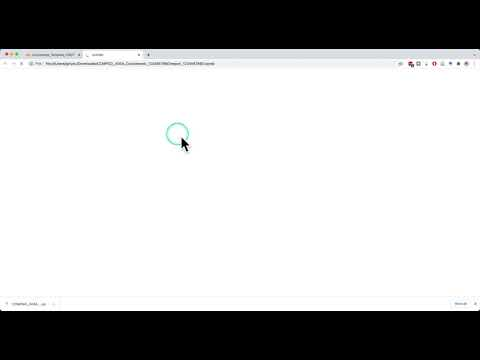

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('JlcJ8FeEvvI', width=1120, height=630)

## Generate and export your files

> Well done! Now run the cell below and it will generate all the files you need for your submission

In [ ]:
# Exporting your submission files

###########################################
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Please do not change this code cell in any way
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###########################################

# checking you did read the above cell and added your information
# again please be smart and add your information above rather than modifying the code below
STUDENT_CHANGED_DEFAULT_VALUES = True

# checking you entered a student number
if YOUR_STUDENT_NUMBER == "REPLACE_WITH_YOUR_STUDENT_NUMBER":
  STUDENT_CHANGED_DEFAULT_VALUES = False
  print("###########################################")
  print("")
  print("Please add your student number in the YOUR_STUDENT_NUMBER variable in the code cell above!")
  print("")
  print("###########################################")

# checking you entered a URL that works
if SHARING_URL_FOR_THIS_COLAB == "REPLACE_WITH_YOUR_SHARING_URL_FOR_THIS_COLAB" :
  STUDENT_CHANGED_DEFAULT_VALUES = False
  print("###########################################")
  print("")
  print("Please add your Colab sharing URL number in the `SHARING_URL_FOR_THIS_COLAB` variable in the code cell above!")
  print("")
  print("###########################################")

if not STUDENT_CHANGED_DEFAULT_VALUES:
  raise ValueError('You have not added you student number and/or shared the sharing URL for your Colab notebook. \n Please read the above cells carefully.')


# define some folder and file names
import os 
report_foldername = "COMPSCI_4004_Coursework_{}".format(YOUR_STUDENT_NUMBER)
report_folderpath = os.path.join("/content", report_foldername)
ipynb_filename = os.path.join(report_folderpath, "report_{}.ipynb".format(YOUR_STUDENT_NUMBER))
html_redirect_filename = os.path.join(report_folderpath, "colab_link_{}.html".format(YOUR_STUDENT_NUMBER))
report_zip_filename = os.path.join(report_folderpath, "{}.zip".format(report_foldername))

# create folder if it does not exist
if not os.path.exists(report_folderpath):
  print("Creating {} folder...".format(report_folderpath))
  os.mkdir(report_folderpath)

# Obtain the notebook JSON as a string
print("Saving notebook as {}...".format(ipynb_filename))

from google.colab import _message
notebook_json = _message.blocking_request('get_ipynb', request='', timeout_sec=60)

# save ipynb part into a file locally
import json
with open(ipynb_filename, 'w') as f:
    f.write(json.dumps(notebook_json["ipynb"]))
    
# export to html
print("Exporting notebook as html file...")
os.system("jupyter nbconvert --to html {}".format(ipynb_filename))

#export to pdf
print("Exporting notebook as pdf file...")
## make sure xetex is installed
print("Installing required librarie, this might take a while, be patient...")
!apt-get -qq install texlive-xetex texlive-fonts-recommended texlive-generic-recommended > /dev/null
## export to pdf
os.system("jupyter nbconvert --to pdf {}".format(ipynb_filename))

# paste the url for this colab in a html file redirecting to it
print("Creating html redirecting file to your Colab...")

html_redirect_content = """
<!DOCTYPE HTML>
<html lang="en-US">
    <head>
        <meta charset="UTF-8">
        <meta http-equiv="refresh" content="0; url={colab_link}">
        <script type="text/javascript">
            window.location.href = "{colab_link}"
        </script>
        <title>Page Redirection</title>
    </head>
    <body>
        <!-- Note: don't tell people to `click` the link, just tell them that it is a link. -->
        If you are not redirected automatically, follow <a href='{colab_link}'>{colab_link}</a>.
    </body>
</html>
""".format(colab_link=SHARING_URL_FOR_THIS_COLAB)

with open(html_redirect_filename, 'w') as f:
    f.write(html_redirect_content)

# # zip the folder with all results
print("Making a zip file of the all thing...")
os.system("cd {}; zip -r {} *".format(report_folderpath, report_zip_filename))

# download the zip folder for submission
print("Downloading the zip file to your computer...")

from google.colab import files
files.download(report_zip_filename)

#
print("")
print("All done! Check and submit the downloaded zip file")

Creating /content/COMPSCI_4004_Coursework_2379875N folder...
Saving notebook as /content/COMPSCI_4004_Coursework_2379875N/report_2379875N.ipynb...
Exporting notebook as html file...
Exporting notebook as pdf file...
Installing required librarie, this might take a while, be patient...
Extracting templates from packages: 100%
Creating html redirecting file to your Colab...
Making a zip file of the all thing...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All done! Check and submit the downloaded zip file
